### Import the Necessary Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
%matplotlib inline
import os

In [2]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

## Pandas Rows and columns configuration:

In [3]:
## set this display max columns and rows as 300,assuming max rows and columns can be 300.
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## 1. Read CSV Files from Dataset Directory:

In [4]:
## get the current directory path
os.getcwd()

'C:\\Users\\Gayathri\\Desktop\\UpGrad\\CREDIT-EDA\\Credit-EDA'

In [5]:
## go to the datsets directory in current path 
file_path = os.path.join(os.getcwd(), os.getcwd()+"/Datasets", "application_data.csv")

In [6]:
file_path

'C:\\Users\\Gayathri\\Desktop\\UpGrad\\CREDIT-EDA\\Credit-EDA/Datasets\\application_data.csv'

In [7]:
## read the csv file
application_dataset = pd.read_csv(file_path)

In [8]:
application_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Structure of the Dataset :

In [9]:
# Finding the no.of Columns & Rows in the dataset:
application_dataset.shape

(307511, 122)

#### From the Shape,there are 307511 rows and 122 columns, in the application_dataset.

In [10]:
# Finding the Total records,Column, emtries & data types:
application_dataset.info(max_cols = 300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [11]:
# Columns in the dataset
print("Columns in the application_dataset : ", application_dataset.columns)
application_dataset.columns

Columns in the application_dataset :  Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [12]:
# Statistical Summary of the numerical columns:
application_dataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## 3. Data Quality Check & Missing Values:


### 3.1 Missing values Identification :

In [13]:
#Calculate the Missing values percentage:
#formula = (missing values in each row/ total rows) * 100 for each and every column.

missing_values = (application_dataset.isnull().sum()/len(application_dataset)) * 100

In [14]:
missing_values

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### 3.2 Dropping the Columns having null percentage above 40%.

In [15]:
## drop the columns whenever missing values greater than 40% because we cant use these for analysis

columns_to_drop = application_dataset.columns[application_dataset.isnull().sum() >= (0.40*len(application_dataset))]
len(columns_to_drop)

49

In [16]:
application_dataset.drop(columns_to_drop, inplace = True, axis = 1)

### 3.3 Check the Columns having missing values percentage less than 40

In [17]:
application_dataset.isnull().sum()/len(application_dataset) * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Null Percentage between 0-5% :

In [18]:
Five_percentage_columns =application_dataset.columns[(application_dataset.isnull().sum() <= (0.05*len(application_dataset)))&(application_dataset.isnull().sum() > (0*len(application_dataset)))]
Five_percentage_columns

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

#### Suggestion :
1.Eliminate the records as missing values percentage greater than 0% and less than or equal to 5% as they donot infur any useful insights in the analysis.


In [19]:
### Use the below code snippet to delete the records:

#columns used : ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'],
#application_dataset = application_dataset.dropna(subset=Five_percentage_columns).reset_index(drop=True)

### Null Percentage between 5 - 40%:

### Categorical Columns:

In [20]:
## identify the categorical columns
categorical_columns = application_dataset.select_dtypes(include=["bool","object","category"]).columns
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [21]:
## Null percentage for categorical columns
((application_dataset[categorical_columns].isnull().sum())/len(application_dataset))*100

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.345545
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
dtype: float64

### OCCUPATION_TYPE :

Unique Values & Counts:
 Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64


<AxesSubplot:>

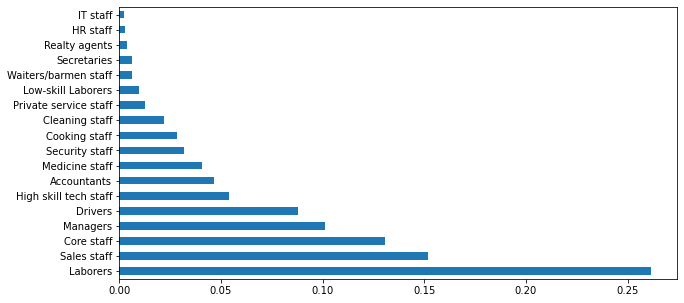

In [22]:
print("Unique Values & Counts:\n", application_dataset["OCCUPATION_TYPE"].value_counts(normalize = True) )
application_dataset["OCCUPATION_TYPE"].value_counts(normalize = True).plot.barh(figsize = (10,5))

### Insights:
1. Laborers is the most frequest & occupies the highest percentage of customers applied for Credit.
2. If the missing values percentage is between 5-13%, Mode is the best method of metric to impute.
3. Here,the missing values percentage is 31.34 & mode might not be the correct imputation metric & deviates the analysis from the original pattern.
4. There is no enough data or source of income and information about the various occupational salary ranges & cannot impute with Laborers.
5. The best technique is to create a new catergoty "Other" and impute the missing values. 

####  Replace the missing value for occupation_type as other_category
##application_dataset["OCCUPATION_TYPE"] = application_dataset["OCCUPATION_TYPE"].fillna("Other_Category")

In [23]:
### EMERGENCYSTATE_MODE

In [24]:
#print("Unique Values & Counts:\n", application_dataset["EMERGENCYSTATE_MODE"].value_counts(normalize = True) )
#application_dataset["EMERGENCYSTATE_MODE"].value_counts(normalize = True).plot.bar(figsize = (8,5))

#### Insights:
1. Here the the most frequemnt type is mode - 'No', 
2. The mising data is 47.39% & is huge. Hence imputing with 'No' might enhance the inisghts about No category people & might be helful for further analysis.
3. The best technique is to create a new catergoty "Other" and impute missing values. 

####  Replace the missing value for EMERGENCYSTATE_MODE as other_category
##application_dataset["EMERGENCYSTATE_MODE"] = application_dataset["EMERGENCYSTATE_MODE"].fillna("Other_Category")

### Numerical Columns:

In [25]:
numerical_columns = application_dataset.select_dtypes(include=["number"]).columns
numerical_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [26]:
((application_dataset[numerical_columns].isnull().sum())/len(application_dataset))*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_

### AMT_REQ_CREDIT_BUREAU_HOUR:

Statistical Summary :
 count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


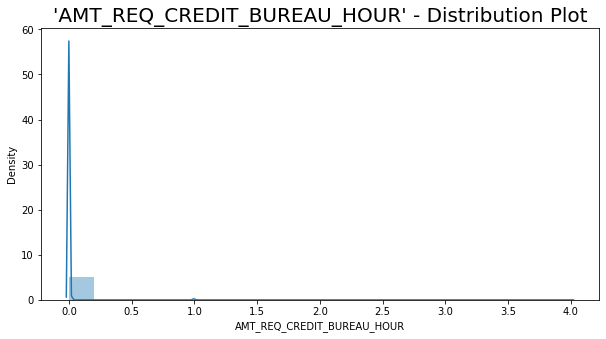

Missing values can be imputed with Mean value : 0.006402448193930645


In [27]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())

plt.figure(figsize = (10,5))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_HOUR' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Mean value : {application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()}")

In [28]:
## Impute the missing value with mean

## application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].mean())

###  AMT_REQ_CREDIT_BUREAU_DAY

Statistical Summary :
 count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


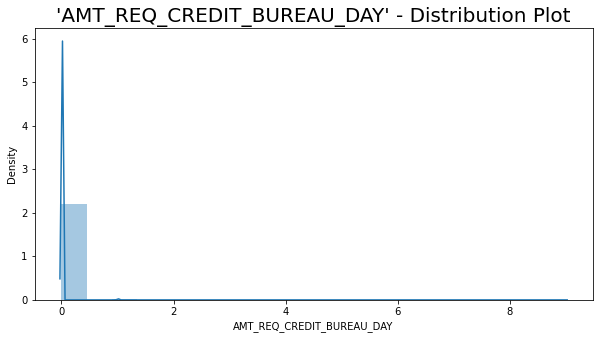

Missing values can be imputed with Mean value : 0.0070002105326475985


In [29]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

plt.figure(figsize = (10,5))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_DAY' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Mean value : {application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].mean()}")

In [30]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'] = application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].mean())

### AMT_REQ_CREDIT_BUREAU_WEEK

Statistical Summary :
 count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


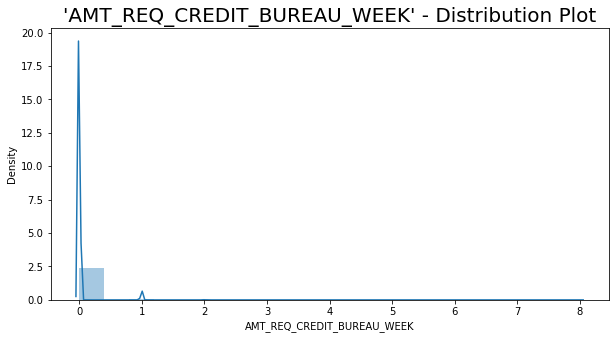

Missing values can be imputed with Mean value : 0.0343619356973142


In [31]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].describe())

plt.figure(figsize = (10,5))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_WEEK' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Mean value : {application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()}")

In [32]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'] = application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].mean())

### AMT_REQ_CREDIT_BUREAU_MON

Statistical Summary :
 count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


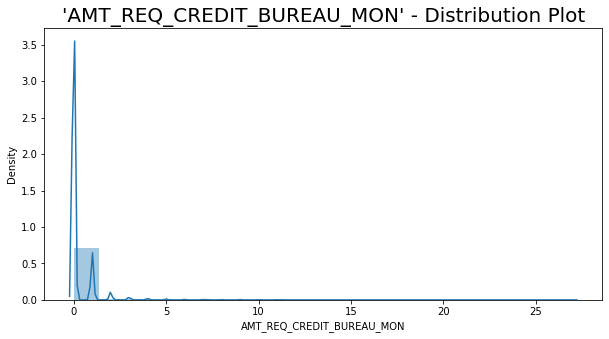

Missing values can be imputed with Mean value : 0.26739526000781977


In [33]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].describe())

plt.figure(figsize = (10,5))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_MON'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_MON' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Mean value : {application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].mean()}")

In [34]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_MON'] = application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].mean())

### AMT_REQ_CREDIT_BUREAU_QRT

Statistical Summary :
 count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


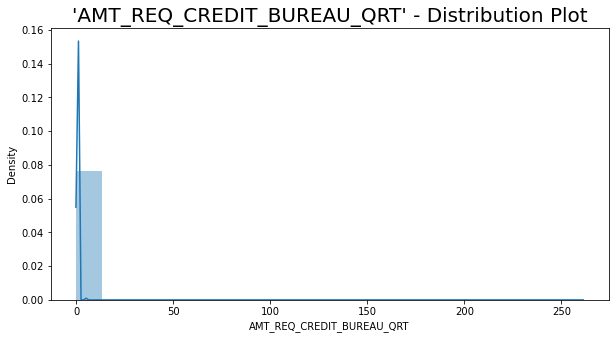

Missing values can be imputed with Mean value : 0.26547414959848414


In [35]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].describe())

plt.figure(figsize = (10,5))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_QRT' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Mean value : {application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].mean()}")

In [36]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'] = application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].mean())

### AMT_REQ_CREDIT_BUREAU_YEAR

Statistical Summary :
 count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


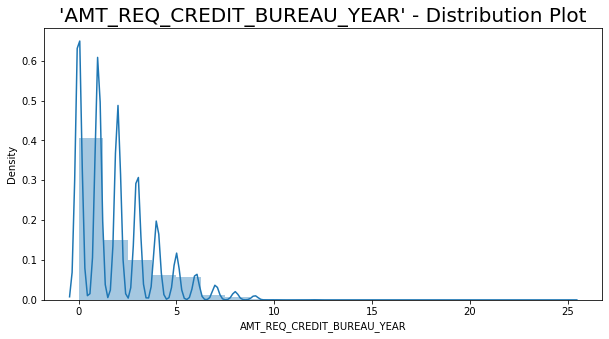

Missing values can be imputed with Mean value : 1.899974435321363


In [37]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].describe())

plt.figure(figsize = (10,5))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_YEAR' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Mean value : {application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()}")

In [38]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].mean())

### 3.4. Sanity Check

### 3.4.1 Typecast DataTypes:

In [39]:
application_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [40]:
application_dataset.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

#### Converting Datatypes :
1.Typecasting Days related columns from float to int data type
2 Converting 2 Unique value types columns from int to object type as they are Yes/No in the format of 1 or 0.
3.Converting OBS_30_CNT_SOCIAL_CIRCLE & DEF_30_CNT_SOCIAL_CIRCLE related 4 columns to object type a they are not showing high correlation which is not helpful for the analysis of defaulters.
4.Converting CNT_CHILDREN & SK_ID_CURR to 'str' data type.
5.TARGET Variable is converted to 'category' data type as we will be further segmenting data based on the Target values.  

In [41]:
# Converting Datatype : For Null Values I am using errors = coerce:

application_dataset[''] = pd.to_numeric(application_dataset[''],errors='coerce')



In [42]:
application_dataset['DAYS_BIRTH'] = application_dataset['DAYS_BIRTH'].astype(int)
application_dataset['DAYS_EMPLOYED'] = application_dataset['DAYS_EMPLOYED'].astype(int)
application_dataset['DAYS_REGISTRATION'] = application_dataset['DAYS_REGISTRATION'].astype(int)
application_dataset['DAYS_ID_PUBLISH'] = application_dataset['DAYS_ID_PUBLISH'].astype(int)
application_dataset['LIVE_CITY_NOT_WORK_CITY'] = application_dataset['LIVE_CITY_NOT_WORK_CITY'].astype('str')
application_dataset['REG_CITY_NOT_WORK_CITY'] = application_dataset['REG_CITY_NOT_WORK_CITY'].astype('str')
application_dataset['REG_CITY_NOT_LIVE_CITY'] = application_dataset['REG_CITY_NOT_WORK_CITY'].astype('str')
application_dataset['FLAG_MOBIL'] = application_dataset['FLAG_MOBIL'].astype('str')

application_dataset['OBS_30_CNT_SOCIAL_CIRCLE'] = application_dataset['OBS_30_CNT_SOCIAL_CIRCLE'].astype('str')
application_dataset['OBS_60_CNT_SOCIAL_CIRCLE'] = application_dataset['OBS_60_CNT_SOCIAL_CIRCLE'].astype('str')
application_dataset['DEF_30_CNT_SOCIAL_CIRCLE'] = application_dataset['DEF_30_CNT_SOCIAL_CIRCLE'].astype('str')
application_dataset['DEF_60_CNT_SOCIAL_CIRCLE'] = application_dataset['DEF_60_CNT_SOCIAL_CIRCLE'].astype('str')

application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('str')
application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'] = application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].astype('str')
application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'] = application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].astype('str')
application_dataset['AMT_REQ_CREDIT_BUREAU_MON'] = application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].astype('str')
application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'] = application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].astype('str')
application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].astype('str')


application_dataset['CNT_CHILDREN'] = application_dataset['CNT_CHILDREN'].astype('str')
application_dataset['SK_ID_CURR'] = application_dataset['SK_ID_CURR'].astype('str')
application_dataset['TARGET'] = application_dataset['TARGET'].astype('category')

### 3.4.1 Convertion of  Negative data in Day_Columns :

In [43]:
# Finding thte negative values using Statistics of all the columns :
application_dataset.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120327,-2994.202373,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,5.143927e-01,0.510853,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,1.910602e-01,0.194844,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,-757.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,6.636171e-01,0.669057,-274.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000

In [44]:
application_dataset['DAYS_BIRTH'] = application_dataset['DAYS_BIRTH'].abs()
application_dataset['DAYS_EMPLOYED'] = application_dataset['DAYS_EMPLOYED'].abs()
application_dataset['DAYS_REGISTRATION'] = application_dataset['DAYS_REGISTRATION'].abs()
application_dataset['DAYS_ID_PUBLISH'] = application_dataset['DAYS_ID_PUBLISH'].abs()
application_dataset['DAYS_LAST_PHONE_CHANGE'] = application_dataset['DAYS_LAST_PHONE_CHANGE'].abs()

#### Why should we convert the above columns into positive values:
For all these columns,Days cannot be negative,hence converted into positive values.

### 3.5 Outliers Detection in Numerical Columns:

### AMT_INCOME_TOTAL

Satitistical Summary :
 count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


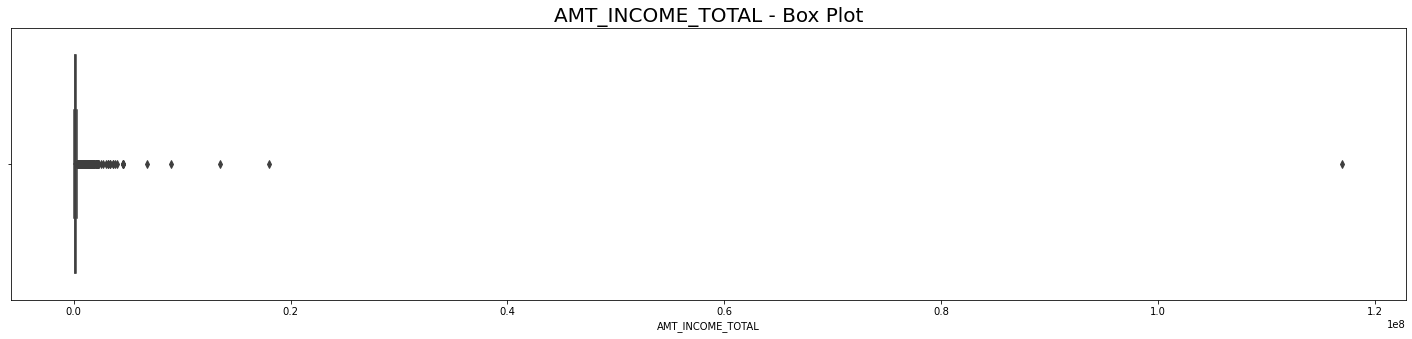

Data points appear above the UPPER_WHISKER 337500.0 can be statistically considered as the Outliers


In [45]:
print("Satitistical Summary :\n",application_dataset['AMT_INCOME_TOTAL'].describe())
plt.figure(figsize = (25,5))

sns.boxplot(application_dataset['AMT_INCOME_TOTAL'])
plt.title("AMT_INCOME_TOTAL - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers".format(upper_whisker))

#### Many data points appear above the UPPER_WHISKER 337500.0 are clustered and one data is too far away.
#### But in real time the Income has no boundaries and can be high for different Income Types.

In [46]:
application_dataset[application_dataset['AMT_INCOME_TOTAL'] == application_dataset['AMT_INCOME_TOTAL'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,12615,922,6762,3643,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
# This value can be imputed as it appears to be Outlier and can be dropped or imputed with the below code snippet.
#application_dataset[application_dataset['AMT_INCOME_TOTAL'] == application_dataset['AMT_INCOME_TOTAL'].max()]
#application_dataset[application_dataset['AMT_INCOME_TOTAL'] > np.percentile(application_dataset['AMT_INCOME_TOTAL'],0.99)].reset_index(drop= True)

### AMT_CREDIT

 Statistical Summary :
 count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


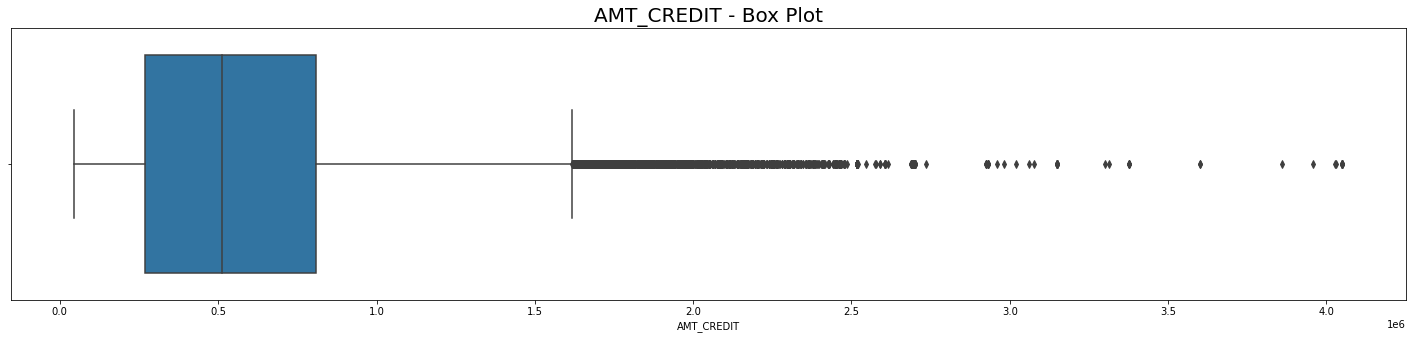

Data points appear above the UPPER_WHISKER 1616625.0 can be statistically considered as the Outliers.


In [48]:
print(" Statistical Summary :\n",application_dataset['AMT_CREDIT'].describe())
plt.figure(figsize = (25,5))

sns.boxplot(application_dataset['AMT_CREDIT'])
plt.title("AMT_CREDIT - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_CREDIT'].quantile(0.25)
Q3 = application_dataset['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many data points appear to be clustered above the UPPER_WHISKER 1616625.0  and many far away from the Upper_WHISKER.
#### But these values cannot be considered as outliers in real time as the Credit amount might be high for high Income groups

### AMT_ANNUITY

 Statistical Summary :
 count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


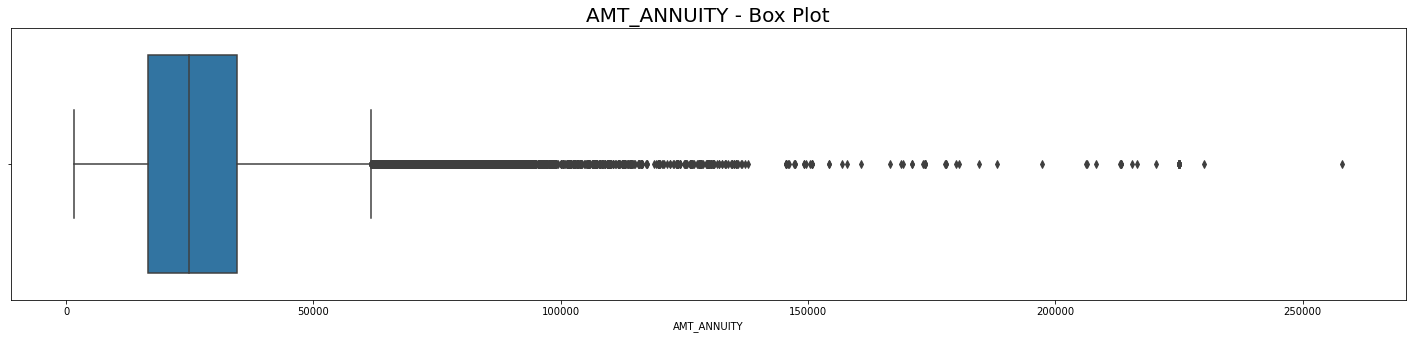

Data points appear above the UPPER_WHISKER 61704.0 can be statistically considered as the Outliers.


In [49]:
print(" Statistical Summary :\n",application_dataset['AMT_ANNUITY'].describe())
plt.figure(figsize = (25,5))

sns.boxplot(application_dataset['AMT_ANNUITY'])
plt.title("AMT_ANNUITY - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_ANNUITY'].quantile(0.25)
Q3 = application_dataset['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many Data points are clustered above the Upper Whisker and many appear to be far away.
#### These Annuity data points  are based on the Credit_Amount and cannot be considered as Outliers

###  AMT_GOODS_PRICE

 Statistical Summary :
 count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


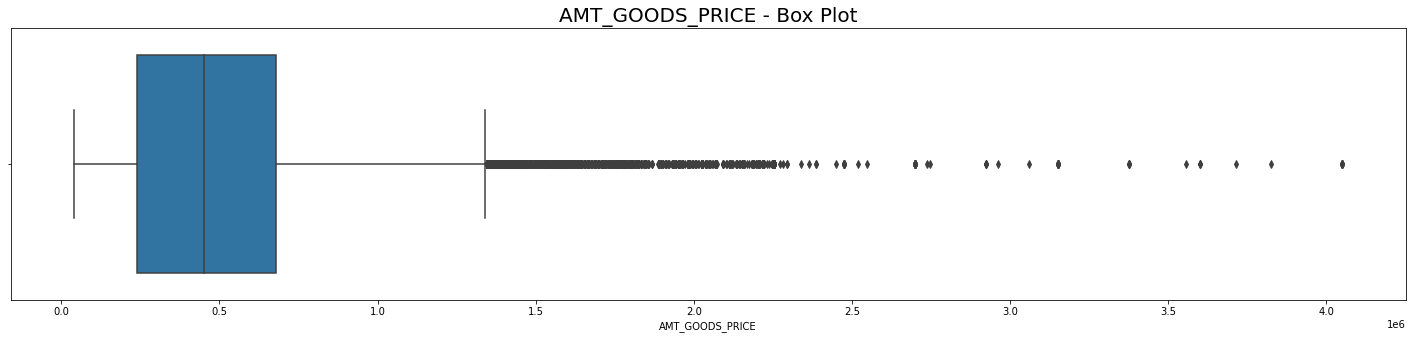

Data points appear above the UPPER_WHISKER 1341000.0 can be statistically considered as the Outliers.


In [50]:
print(" Statistical Summary :\n",application_dataset['AMT_GOODS_PRICE'].describe())
plt.figure(figsize = (25,5))

sns.boxplot(application_dataset['AMT_GOODS_PRICE'])
plt.title("AMT_GOODS_PRICE - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = application_dataset['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many Data Points are clustered above UpperWhisker and far away from the upper Whisker
#### These points cannot be cosidered as Outliers as we do not enough source related to the Goods Categories & its Price to prove that this data points are outliers 

### DAYS_EMPLOYED

 Statistical Summary :
 count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


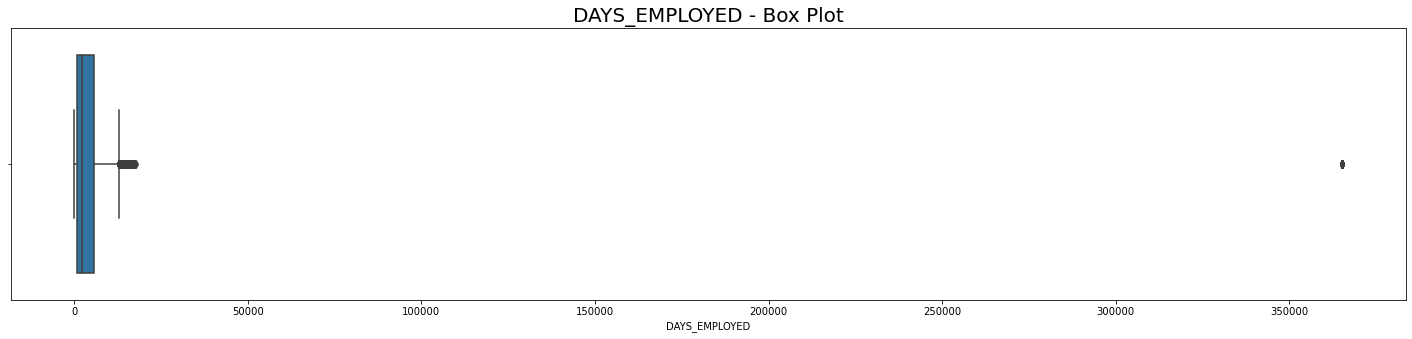

Data points appear above the UPPER_WHISKER 12868.0 can be statistically considered as the Outliers.


In [51]:
print(" Statistical Summary :\n",application_dataset['DAYS_EMPLOYED'].describe())
plt.figure(figsize = (25,5))

sns.boxplot(application_dataset['DAYS_EMPLOYED'])
plt.title("DAYS_EMPLOYED - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['DAYS_EMPLOYED'].quantile(0.25)
Q3 = application_dataset['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)
employed_max = application_dataset['DAYS_EMPLOYED'].max()

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Some data points are clusteres above the Upper Whisker & one data point is very far from the Upper Whisker.
####  Max Value of Days_Employed is 365243.0 insignificant as Days_Employed cannot exceed the Max DAYS_BIRTH 25229.0
#### This value should be considered as Outlier and replaced with 99 percentile value.

In [52]:
#print("No.of Records with Max Value is : ",len(application_dataset[application_dataset['DAYS_EMPLOYED'] == application_dataset['DAYS_EMPLOYED'].max()]))
#application_dataset[application_dataset['DAYS_EMPLOYED'] == application_dataset['DAYS_EMPLOYED'].max()]
#application_dataset[application_dataset['DAYS_EMPLOYED'] > np.percentile(application_dataset['DAYS_EMPLOYED'],0.99)].reset_index(drop= True)

### 3.6 Binning 2 Numerical Continous Variable:

### AMT_INCOME_TOTAL

In [53]:
application_dataset['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

#### Binning AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_bin so we don't loose data and have binned values

0-5L           304809
5-10L            2452
10L-15L           166
15L-20L            40
20L-25L            25
25L & above        14
Name: AMT_INCOME_TOTAL_range, dtype: int64


<AxesSubplot:>

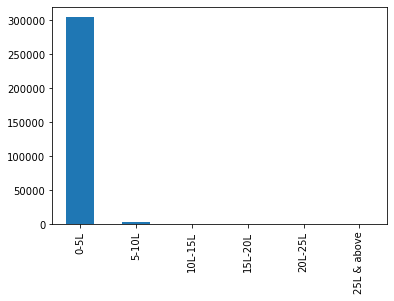

In [54]:
# AMT_INCOME_TOTAL
bins = [0, 500000, 1000000, 1500000, 2000000, 2500000, 5000000]
range = ['0-5L', '5-10L', '10L-15L', '15L-20L', '20L-25L','25L & above']

application_dataset['AMT_INCOME_TOTAL_range'] = pd.cut(application_dataset['AMT_INCOME_TOTAL'], bins , labels = range )
print(application_dataset['AMT_INCOME_TOTAL_range'].value_counts())
application_dataset['AMT_INCOME_TOTAL_range'].value_counts().plot.bar()

### AMT_CREDIT

In [55]:
application_dataset['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

#### Binning AMT_CREDIT into AMT_CREDIT_bin so we don't loose data and have binned values

0-5L           149333
5-10L          108193
10L-15L         39229
15L-20L          8727
20L-25L          1668
25L & above       361
Name: AMT_CREDIT_range, dtype: int64


<AxesSubplot:>

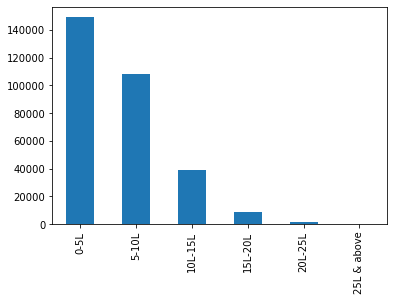

In [56]:
# AMT_CREDIT
bins = [0, 500000, 1000000, 1500000, 2000000, 2500000, 5000000]
range = ['0-5L', '5-10L', '10L-15L', '15L-20L', '20L-25L','25L & above']

application_dataset['AMT_CREDIT_range'] = pd.cut(application_dataset['AMT_CREDIT'], bins , labels = range )

print(application_dataset['AMT_CREDIT_range'].value_counts())
application_dataset['AMT_CREDIT_range'].value_counts().plot.bar()

### DAYS_BIRTH

In [57]:
application_dataset['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

30-40         82308
40-50         76541
50-60         68062
20-30         45021
60 & above    35579
0-20              0
Name: DAYS_BIRTH_range, dtype: int64


<AxesSubplot:>

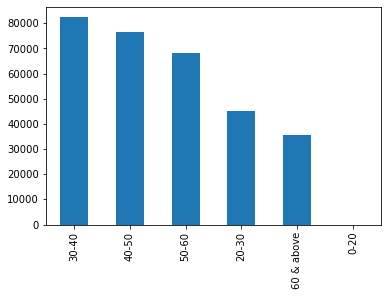

In [58]:
bins = [0, 7300, 10950, 14600, 18250, 21900, 36500]
range = ['0-20', '20-30', '30-40', '40-50', '50-60','60 & above']

application_dataset['DAYS_BIRTH_range'] = pd.cut(application_dataset['DAYS_BIRTH'], bins , labels = range )

print(application_dataset['DAYS_BIRTH_range'].value_counts())
application_dataset['DAYS_BIRTH_range'].value_counts().plot.bar()

## 3.7 Unnecesary / Irrelevant Columns Elimination:

In [59]:
len(application_dataset.columns)

76

In [60]:
unnecessary_columns = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
                      'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
                      'FLAG_DOCUMENT_2','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
                      'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                      'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
                      'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                      'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
                      'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
                       'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [61]:
len(unnecessary_columns)

33

#### Reasoning: Deleting all Flag Columns as they are Categorical & not required for analyis of Taget variable.

In [62]:
application_dataset =  application_dataset.drop(unnecessary_columns, axis = 1)

In [63]:
application_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_range,AMT_CREDIT_range,DAYS_BIRTH_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,Laborers,1.0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0-5L,0-5L,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,Core staff,2.0,1,MONDAY,11,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-5L,10L-15L,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,Laborers,1.0,2,MONDAY,9,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-5L,0-5L,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,Laborers,2.0,2,WEDNESDAY,17,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,nan,nan,nan,nan,nan,nan,0-5L,0-5L,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,Core staff,1.0,2,THURSDAY,11,1,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-5L,5-10L,50-60


In [64]:
len(application_dataset.columns)

44

#### Reasons for Irrelevant columns : 

####  External sources:
1.These columns are irreleveant because it has the information collected from the external data,since we dont know the exact source from this data collected we cannot get any meaningful insights from them.
#### Flag Documents:
2.Flag documents are the various types of documents provided by customer , since we dont know what types of documents provided by the customer, we can eliminate them completely.
#### Apartment Variables:
3.These are the normalized information from the external source.These might not be helpful in analysis with target variable. 
   
#### Note: I am not eliminating these columns from the original dataset..!!

## 4. Analysis:

### 4.1 Check the data balance Percentage

### Target Variable :

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


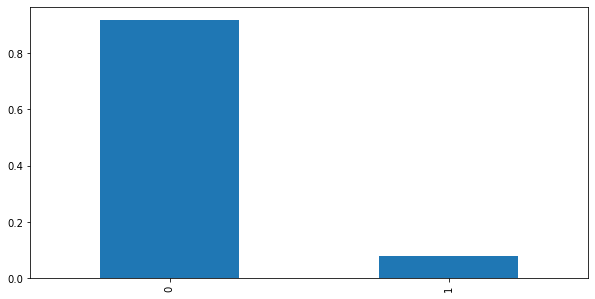

In [65]:
print(application_dataset['TARGET'].value_counts(normalize = True) * 100 )
application_dataset['TARGET'].value_counts(normalize = True).plot.bar(figsize = (10,5))
plt.show()

####  Insights:
1. Data is highly Imbalanced
2. Target  = 0 is 91.93% , Client without Payemnt Diffiluties - Non Default
3. Target  = 1 is 8.07%  , Client with Payment Difficulties -   Default
4. Lets understand how the numerical & categorical variables impact the Approval or denial of the Credit.

### 4.2 Divide / Segment the data into 2  datasets

In [82]:
# Creating 2 seperate datasets with Target == 0  & Target == 1
application_dataset_0 = application_dataset[application_dataset['TARGET'] == 0 ]
application_dataset_1 = application_dataset[application_dataset['TARGET'] == 1 ]

In [83]:
# 
application_dataset_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_range,AMT_CREDIT_range,DAYS_BIRTH_range
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,Core staff,2.0,1,MONDAY,11,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-5L,10L-15L,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,Laborers,1.0,2,MONDAY,9,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-5L,0-5L,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,Laborers,2.0,2,WEDNESDAY,17,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,nan,nan,nan,nan,nan,nan,0-5L,0-5L,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,Core staff,1.0,2,THURSDAY,11,1,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-5L,5-10L,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970,477,1,Laborers,2.0,2,WEDNESDAY,16,0,0,0,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0-5L,0-5L,40-50


In [84]:
application_dataset_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_range,AMT_CREDIT_range,DAYS_BIRTH_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,Laborers,1.0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0-5L,0-5L,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573,1827,1,Cooking staff,1.0,3,MONDAY,9,0,0,0,Business Entity Type 3,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0-5L,5-10L,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182,1029,1,Laborers,2.0,2,TUESDAY,9,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0-5L,10L-15L,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45,4409,1,Sales staff,2.0,3,THURSDAY,11,0,0,0,Self-employed,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0-5L,0-5L,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391,4199,1,NaN,2.0,2,THURSDAY,10,0,0,0,XNA,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0-5L,0-5L,60 & above


### 4.3 Univariate Analysis


### Continuous Numerical  Variables:

In [85]:
application_dataset.select_dtypes(include=["number"]).columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START'],
      dtype='object')

### AMT_INCOME_TOTAL

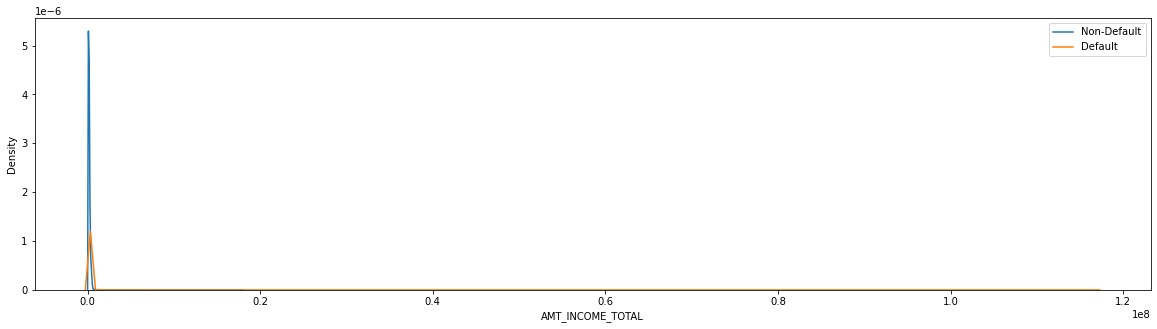

In [86]:
plt.figure(figsize = (20,5))

sns.distplot(application_dataset_0['AMT_INCOME_TOTAL'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['AMT_INCOME_TOTAL'] , hist = False , label='Default')

plt.legend() 
plt.show()

#### Insights:

### AMT_CREDIT

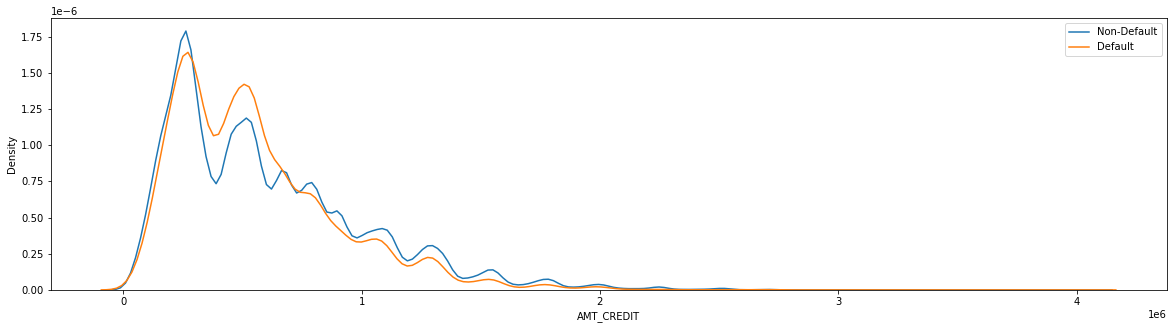

In [87]:
plt.figure(figsize = (20,5))

sns.distplot(application_dataset_0['AMT_CREDIT'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['AMT_CREDIT'] , hist = False , label ='Default')

plt.legend() 
plt.show()

#### Insights:

### AMT_ANNUITY 

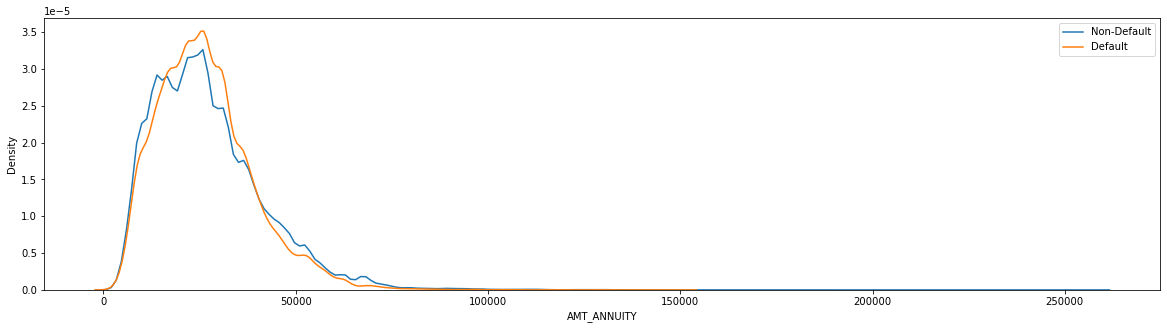

In [88]:
plt.figure(figsize = (20,5))

sns.distplot(application_dataset_0['AMT_ANNUITY'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['AMT_ANNUITY'] , hist = False , label='Default')

plt.legend() 
plt.show()

#### Insights:

### AMT_GOODS_PRICE

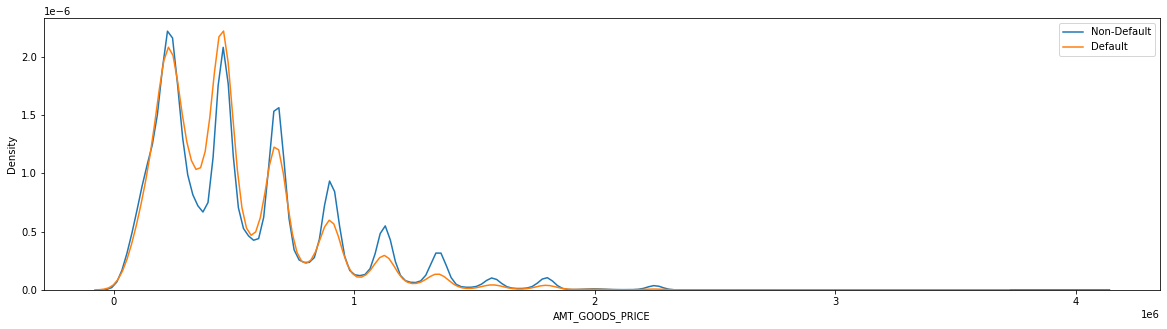

In [89]:
plt.figure(figsize = (20,5))

sns.distplot(application_dataset_0['AMT_GOODS_PRICE'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['AMT_GOODS_PRICE'] , hist = False , label ='Default')

plt.legend()
plt.show()

#### Insights:

### CNT_FAM_MEMBERS

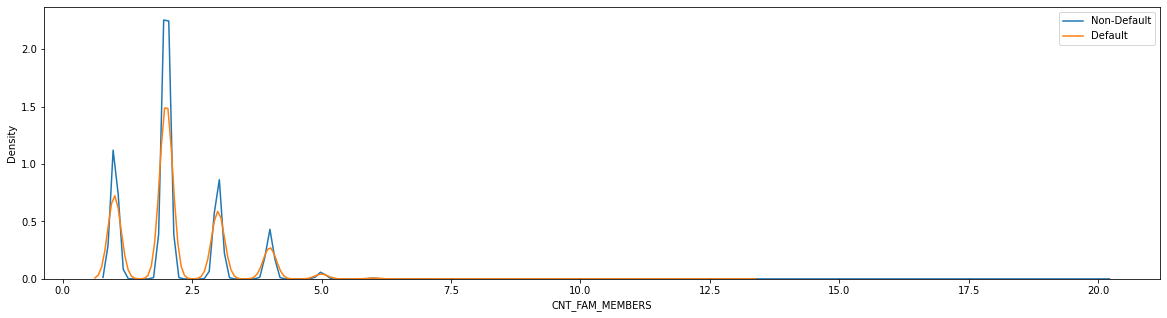

In [90]:
plt.figure(figsize = (20,5))

sns.distplot(application_dataset_0['CNT_FAM_MEMBERS'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['CNT_FAM_MEMBERS'] , hist = False , label ='Default')

plt.legend()
plt.show()

#### Insights:

### DAYS_BIRTH

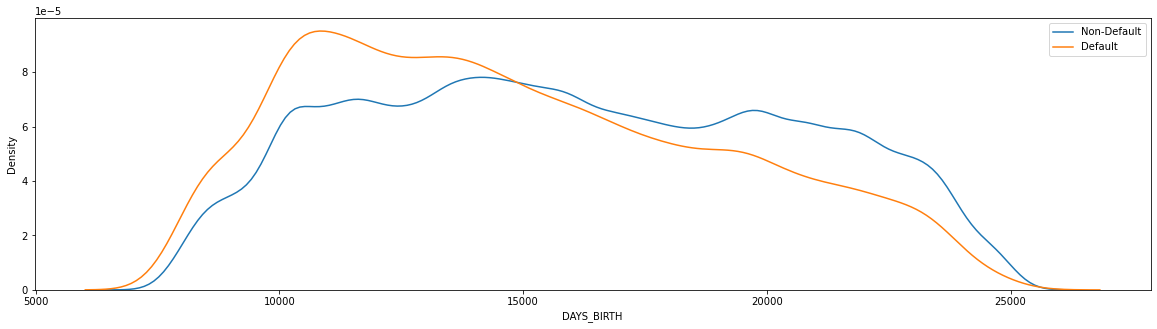

In [91]:
plt.figure(figsize = (20,5))

sns.distplot(application_dataset_0['DAYS_BIRTH'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['DAYS_BIRTH'] , hist = False , label='Default')

plt.legend() 
plt.show()

#### Insights:

### DAYS_EMPLOYED

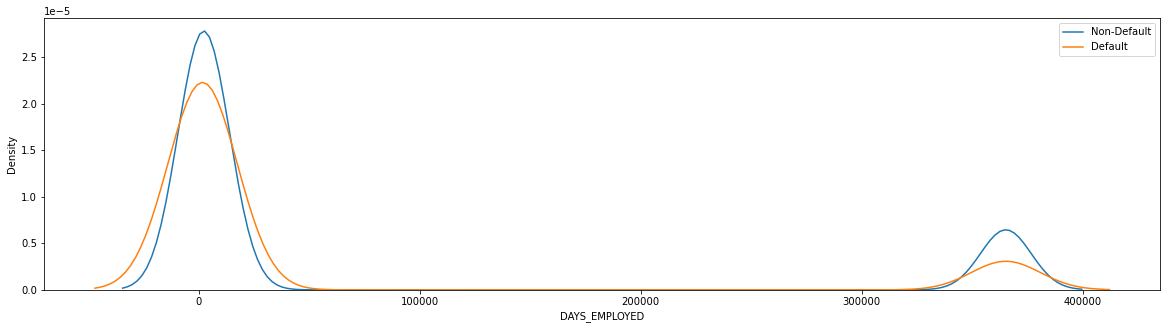

In [92]:
plt.figure(figsize = (20,5))

sns.distplot(application_dataset_0['DAYS_EMPLOYED'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['DAYS_EMPLOYED'] , hist = False , label ='Default')

plt.legend()
plt.show()

#### Insights:

### Categorical Columns:

In [93]:
application_dataset.select_dtypes(include=["bool","object","category"]).columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_TOTAL_range',
       'AMT_CREDIT_range', 'DAYS_BIRTH_range'],
      dtype='object')

### NAME_CONTRACT_TYPE

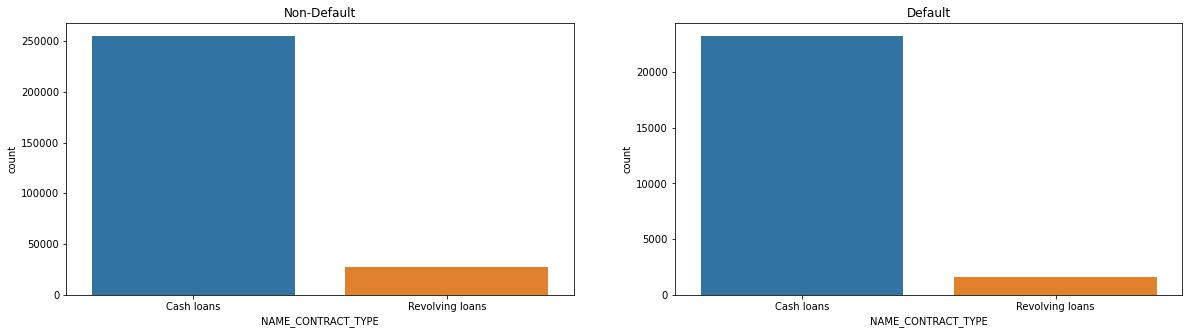

In [94]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['NAME_CONTRACT_TYPE']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['NAME_CONTRACT_TYPE'])
plt.show()

#### Insights:

### NAME_TYPE_SUITE

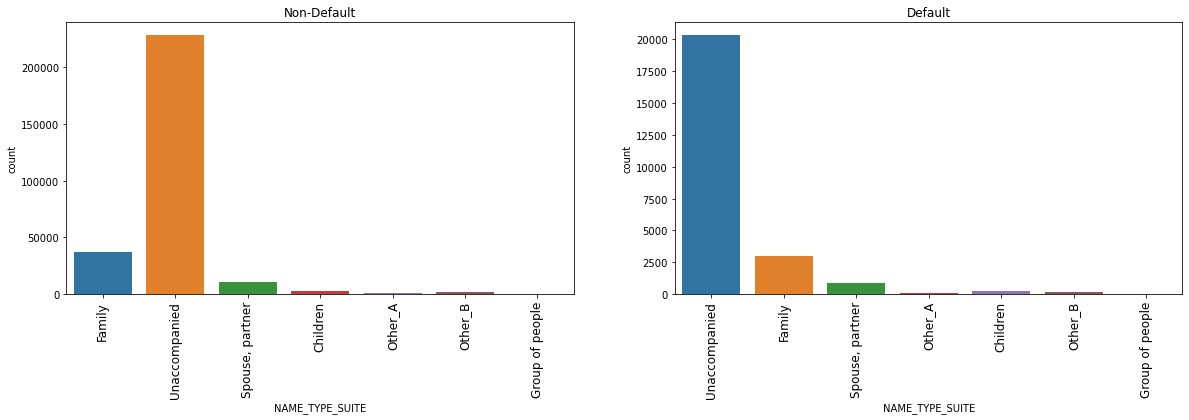

In [95]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['NAME_TYPE_SUITE']) 
plt.xticks(rotation = 90 , fontsize = 12 )

plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['NAME_TYPE_SUITE'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

### NAME_INCOME_TYPE

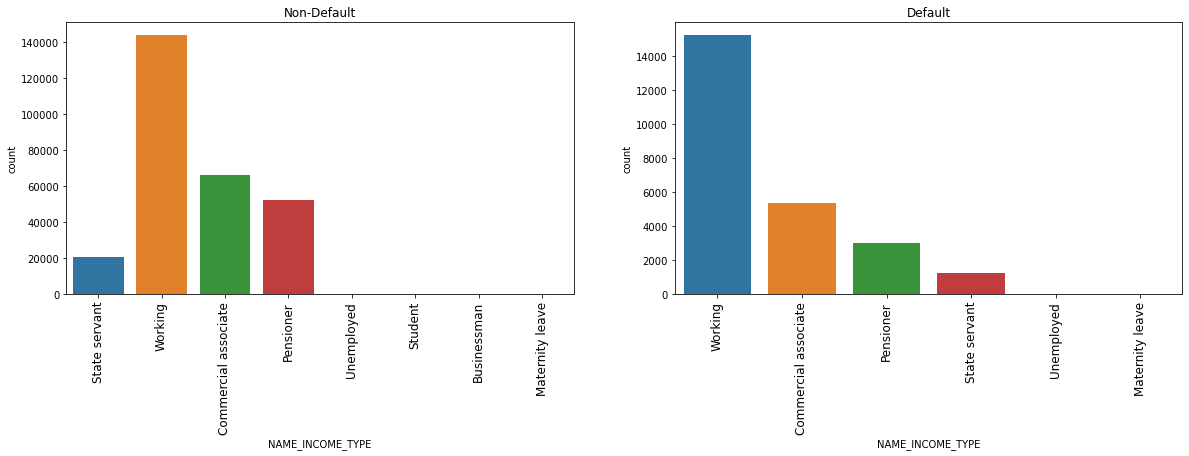

In [96]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['NAME_INCOME_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['NAME_INCOME_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

### NAME_EDUCATION_TYPE

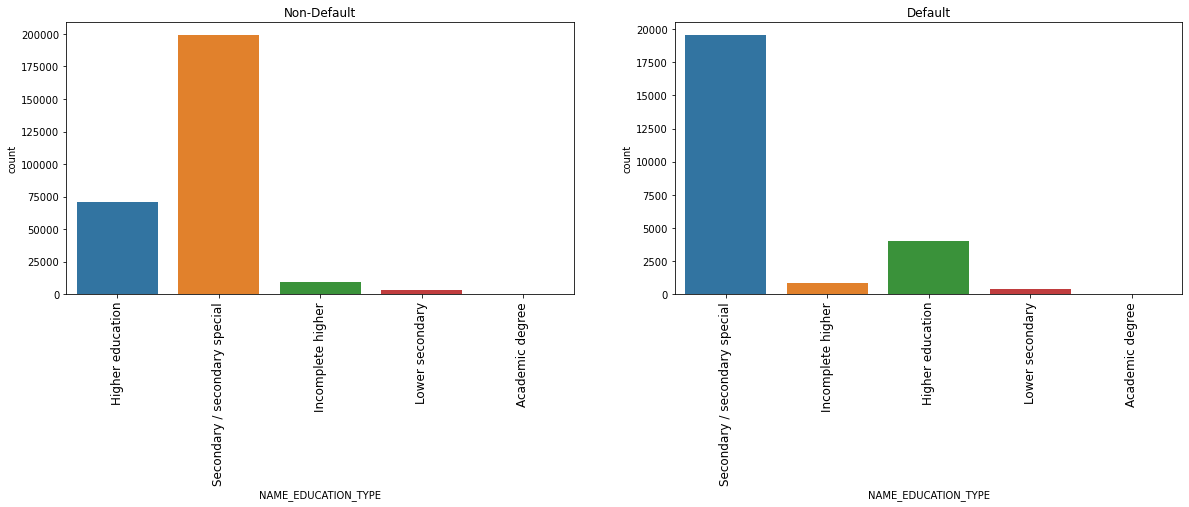

In [97]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['NAME_EDUCATION_TYPE']) 
plt.xticks(rotation = 90 , fontsize = 12 )

plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['NAME_EDUCATION_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

### NAME_FAMILY_STATUS

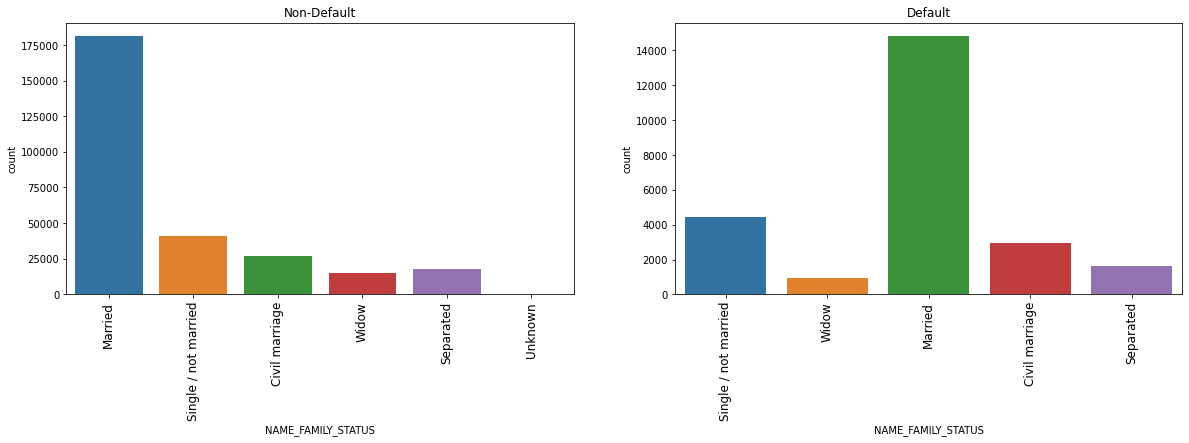

In [98]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['NAME_FAMILY_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12 )

plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['NAME_FAMILY_STATUS'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

### NAME_HOUSING_TYPE 

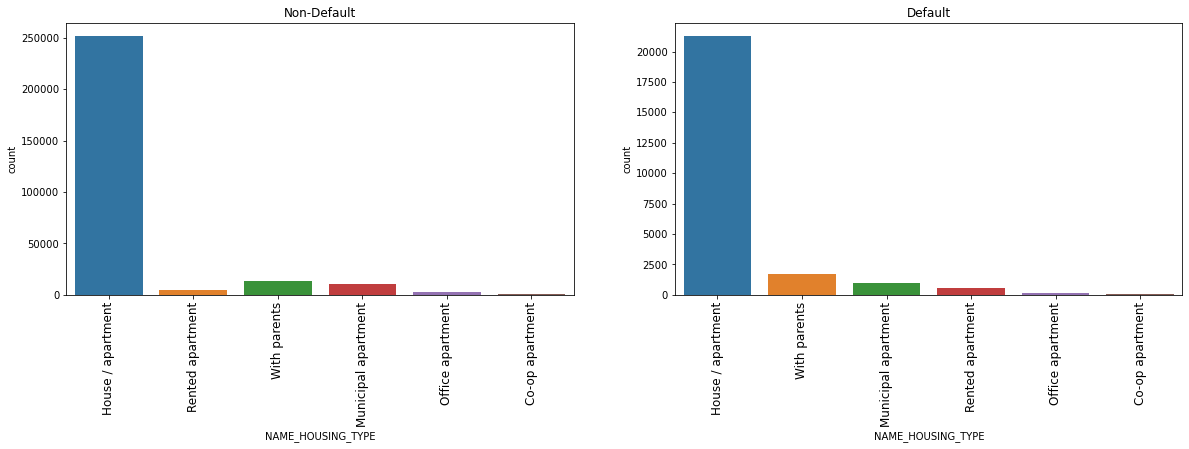

In [99]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['NAME_HOUSING_TYPE']) 
plt.xticks(rotation = 90 , fontsize = 12 )
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['NAME_HOUSING_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

### OCCUPATION_TYPE

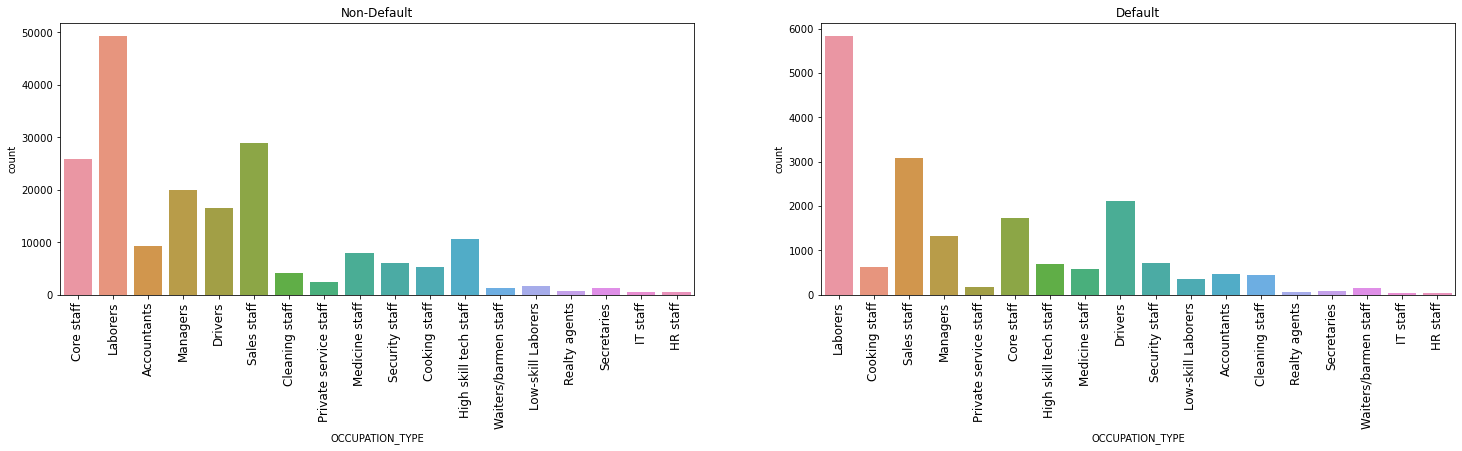

In [100]:
plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['OCCUPATION_TYPE']) 
plt.xticks(rotation = 90 , fontsize = 12 )

plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['OCCUPATION_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

### WEEKDAY_APPR_PROCESS_START

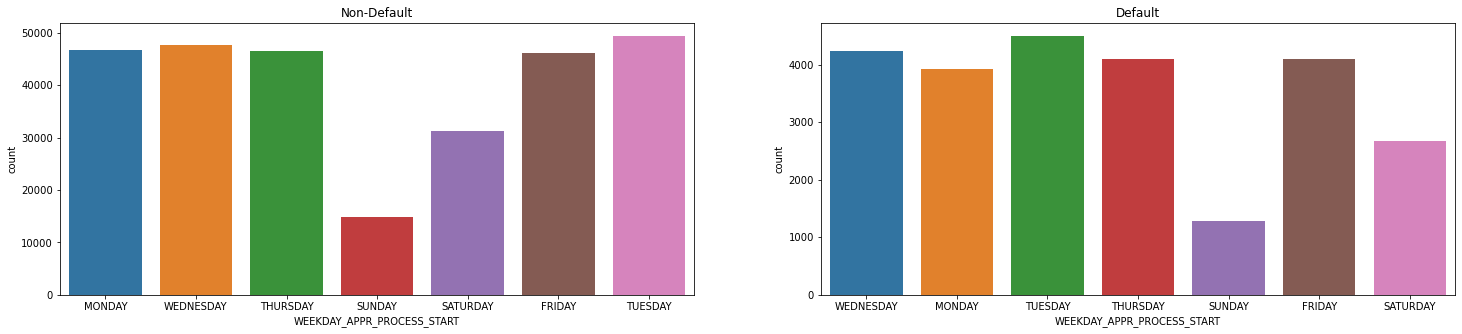

In [101]:
plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['WEEKDAY_APPR_PROCESS_START']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['WEEKDAY_APPR_PROCESS_START'])
plt.show()

#### Insights:

### ORGANIZATION_TYPE

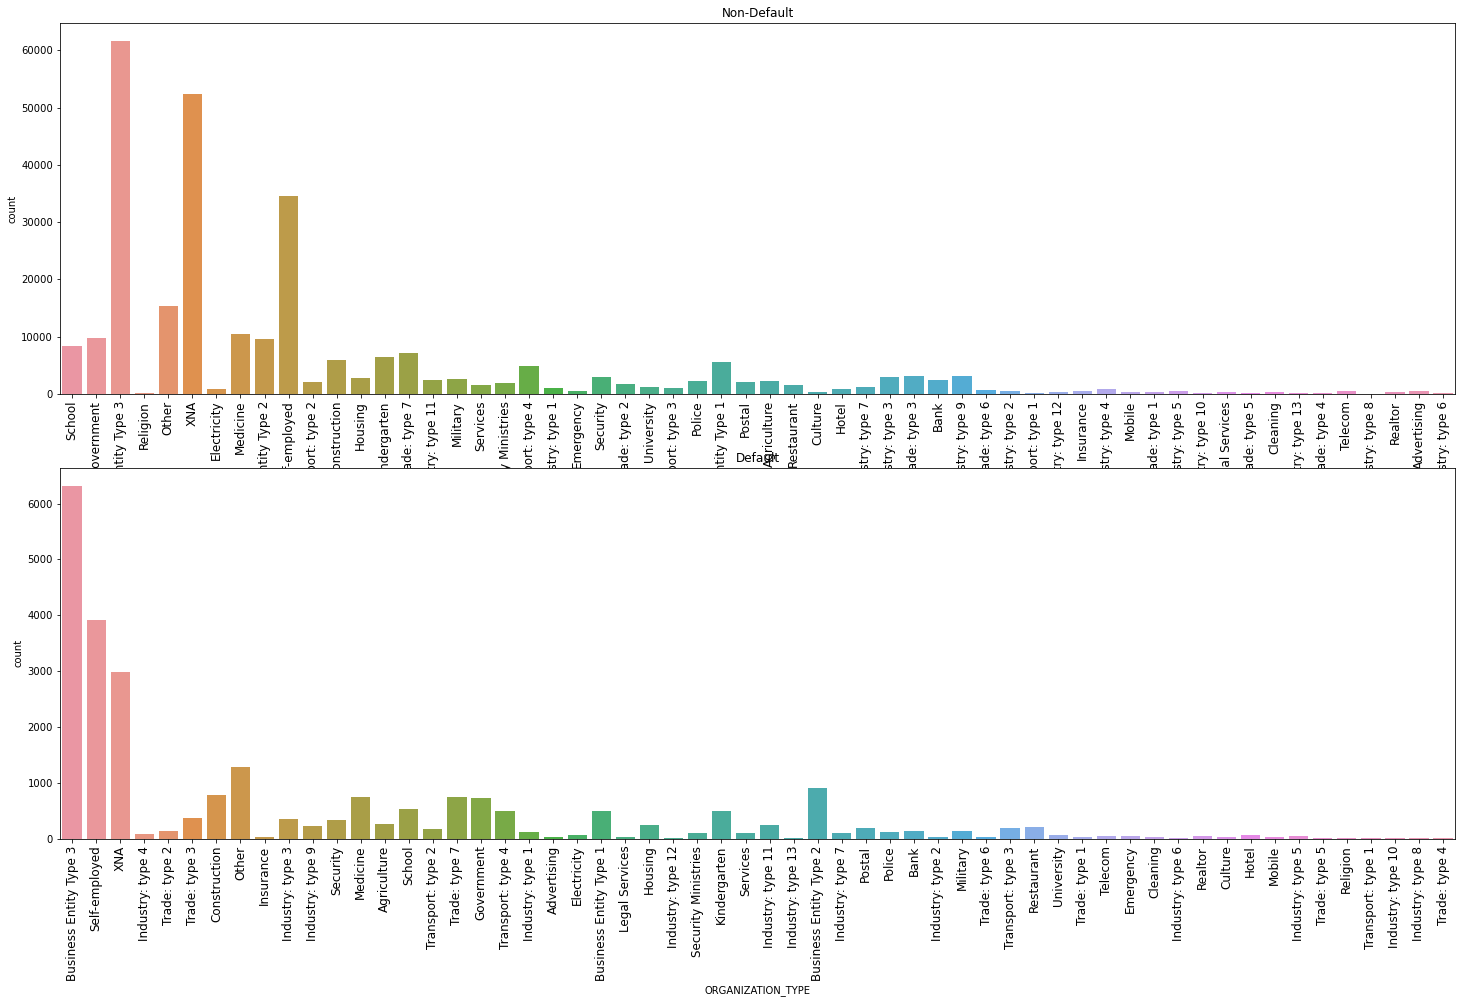

In [102]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['ORGANIZATION_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )
              
plt.subplot(2,1,2)
plt.title("Default")
sns.countplot(application_dataset_1['ORGANIZATION_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

### AMT_INCOME_TOTAL_range

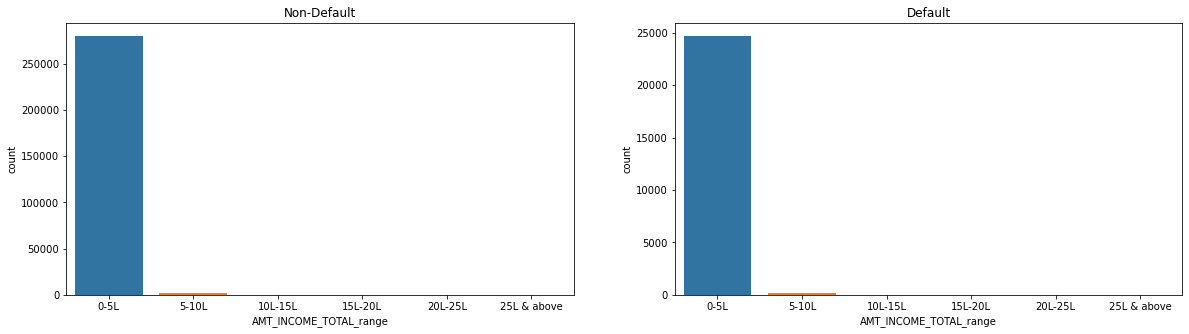

In [103]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['AMT_INCOME_TOTAL_range']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['AMT_INCOME_TOTAL_range'])

plt.show()

#### Insights:

### AMT_CREDIT_range

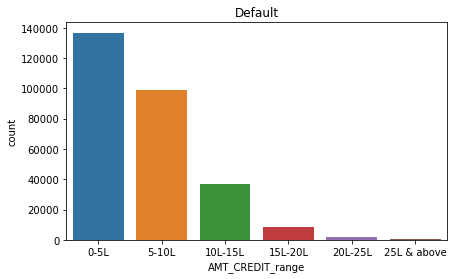

In [104]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['AMT_CREDIT_range']) 
              
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(application_dataset_1['AMT_CREDIT_range'])

plt.show()

#### Insights:

## Bivariate Analysis

### Catergorical - Continuos

### CODE_GENDER Vs AMT_INCOME_TOTAL 

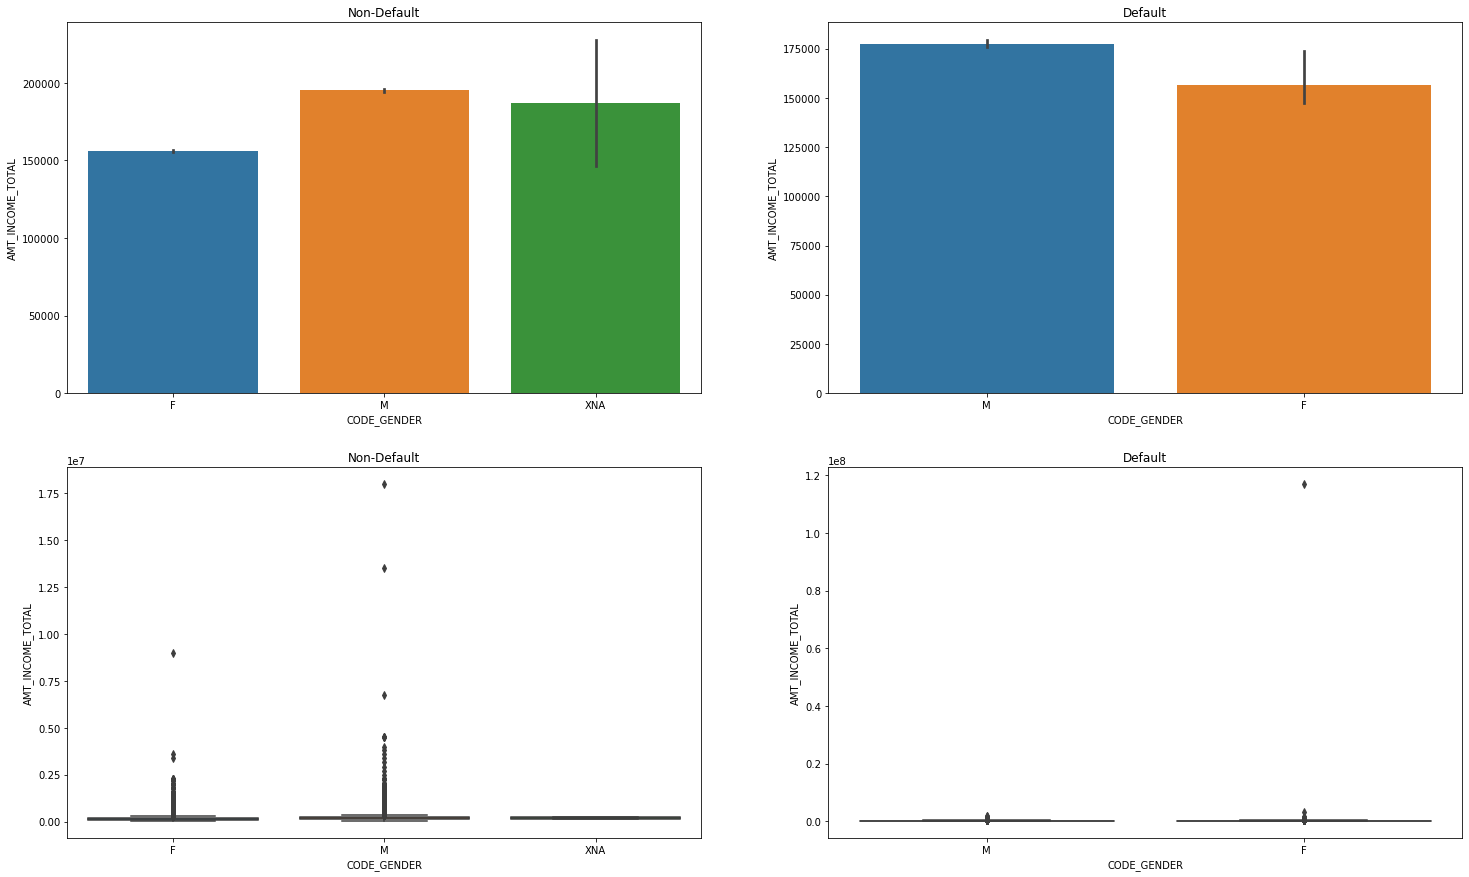

In [106]:
plt.figure(figsize = (25,15))

plt.subplot(2,2,1)
plt.title("Non-Default")
sns.barplot(data = application_dataset_0 , x = 'CODE_GENDER' , y = 'AMT_INCOME_TOTAL' )
  
              
plt.subplot(2,2,2)
plt.title("Default")
sns.barplot(data = application_dataset_1 , x = 'CODE_GENDER' , y = 'AMT_INCOME_TOTAL')

plt.subplot(2,2,3)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'CODE_GENDER' , y = 'AMT_INCOME_TOTAL' )
  
              
plt.subplot(2,2,4)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'CODE_GENDER' , y = 'AMT_INCOME_TOTAL')

plt.show()

#### Insights:

### CODE_GENDER - AMT_CREDIT

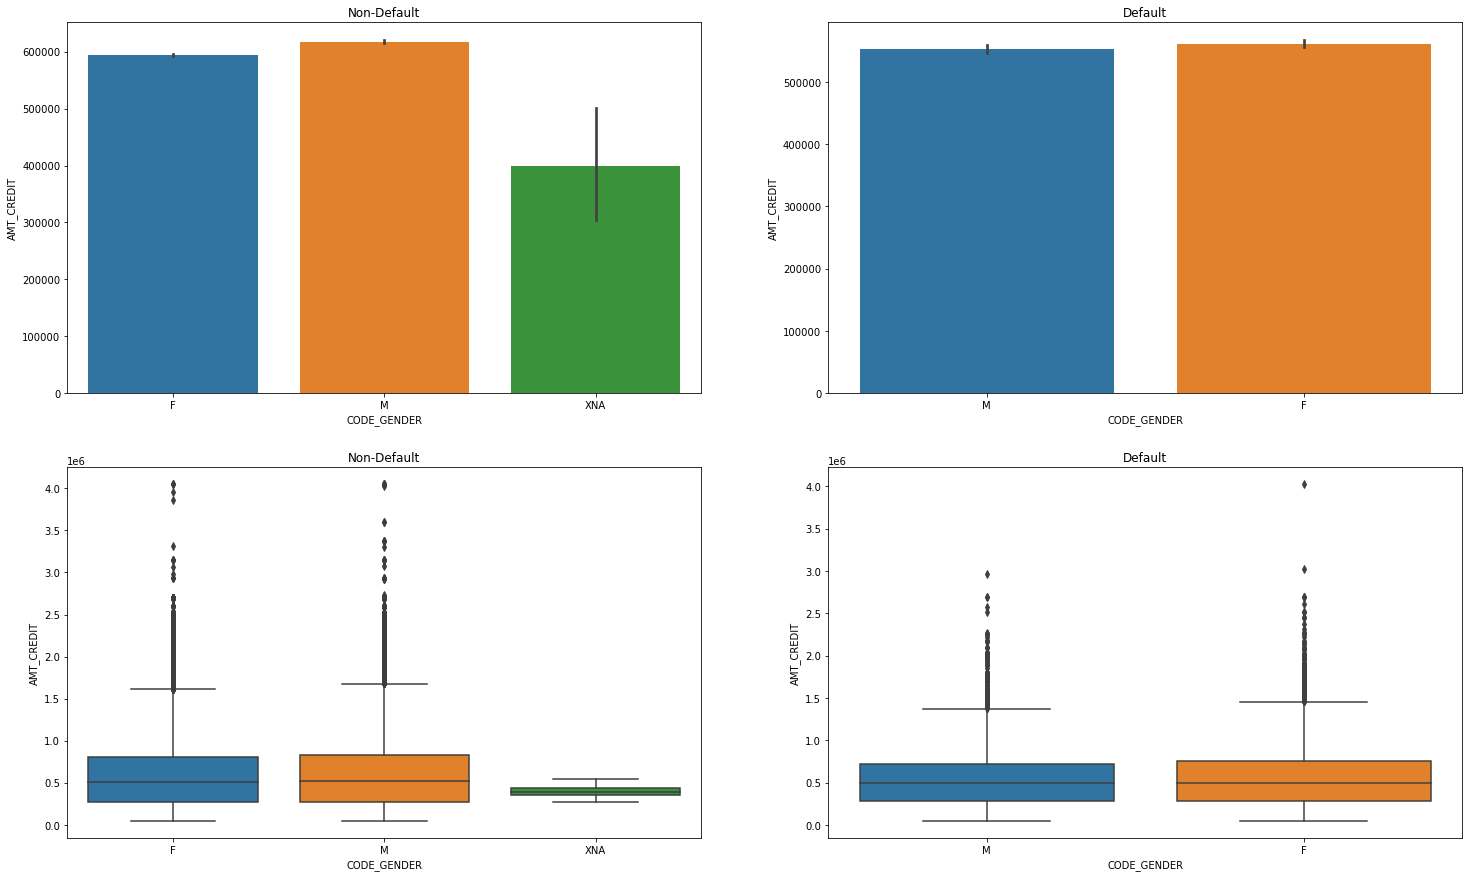

In [107]:
plt.figure(figsize = (25,15))
           
plt.subplot(2,2,1)
plt.title("Non-Default")
sns.barplot(data = application_dataset_0 , x = 'CODE_GENDER' , y = 'AMT_CREDIT' )
  
              
plt.subplot(2,2,2)
plt.title("Default")
sns.barplot(data = application_dataset_1 , x = 'CODE_GENDER' , y = 'AMT_CREDIT')


plt.subplot(2,2,3)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'CODE_GENDER' , y = 'AMT_CREDIT' )
  
              
plt.subplot(2,2,4)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'CODE_GENDER' , y = 'AMT_CREDIT')

plt.show()



#### Insights:


### NAME_CONTRACT_TYPE - AMT_CREDIT

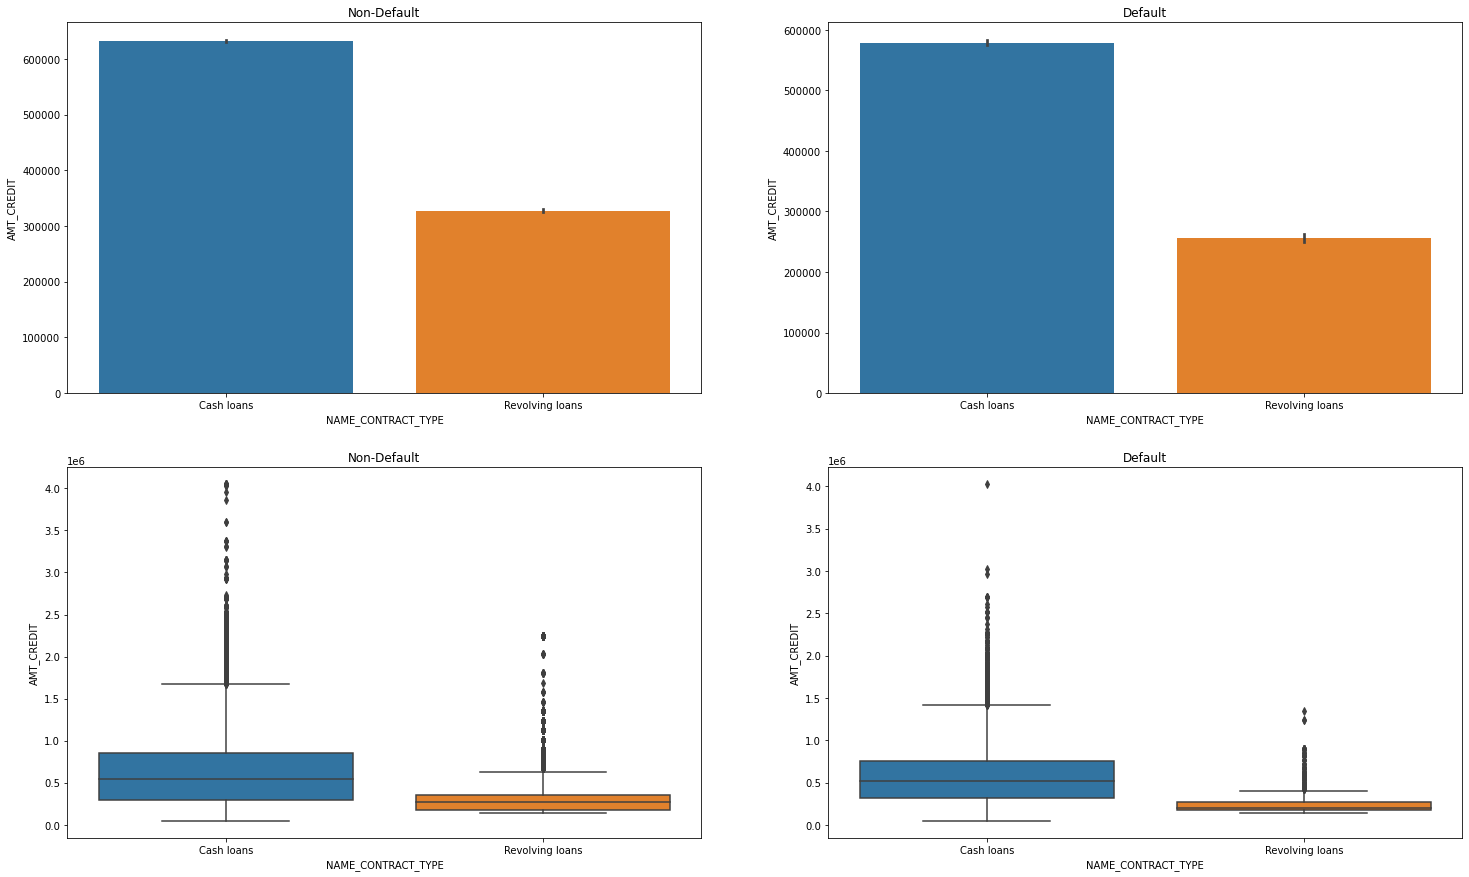

In [108]:
plt.figure(figsize = (25,15))

plt.subplot(2,2,1)
plt.title("Non-Default")
sns.barplot(data = application_dataset_0 , x = 'NAME_CONTRACT_TYPE' , y = 'AMT_CREDIT' )
  
              
plt.subplot(2,2,2)
plt.title("Default")
sns.barplot(data = application_dataset_1 , x = 'NAME_CONTRACT_TYPE' , y = 'AMT_CREDIT')

plt.subplot(2,2,3)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_CONTRACT_TYPE' , y = 'AMT_CREDIT' )
  
              
plt.subplot(2,2,4)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_CONTRACT_TYPE' , y = 'AMT_CREDIT')

plt.show()


#### Insights:

### ORGANIZATION_TYPE - 'AMT_CREDIT'

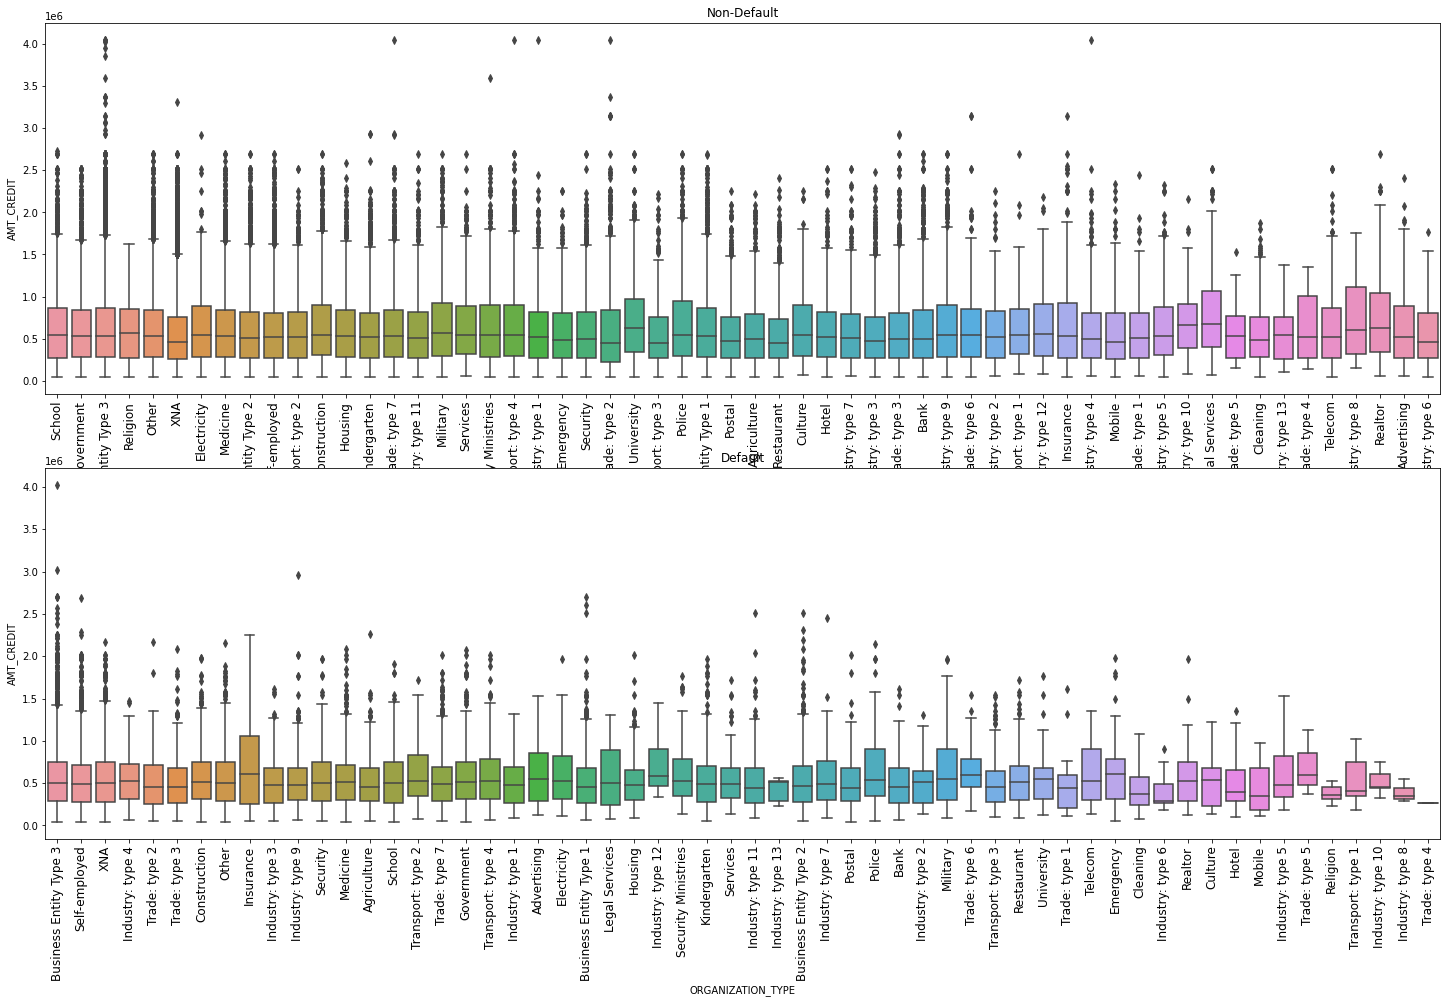

In [109]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'ORGANIZATION_TYPE' , y = 'AMT_CREDIT' )
plt.xticks(rotation = 90, fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'ORGANIZATION_TYPE' , y = 'AMT_CREDIT')
plt.xticks(rotation = 90, fontsize = 12) 
plt.show()

#### Insights:

### OCCUPATION_TYPE -  AMT_ANNUITY 

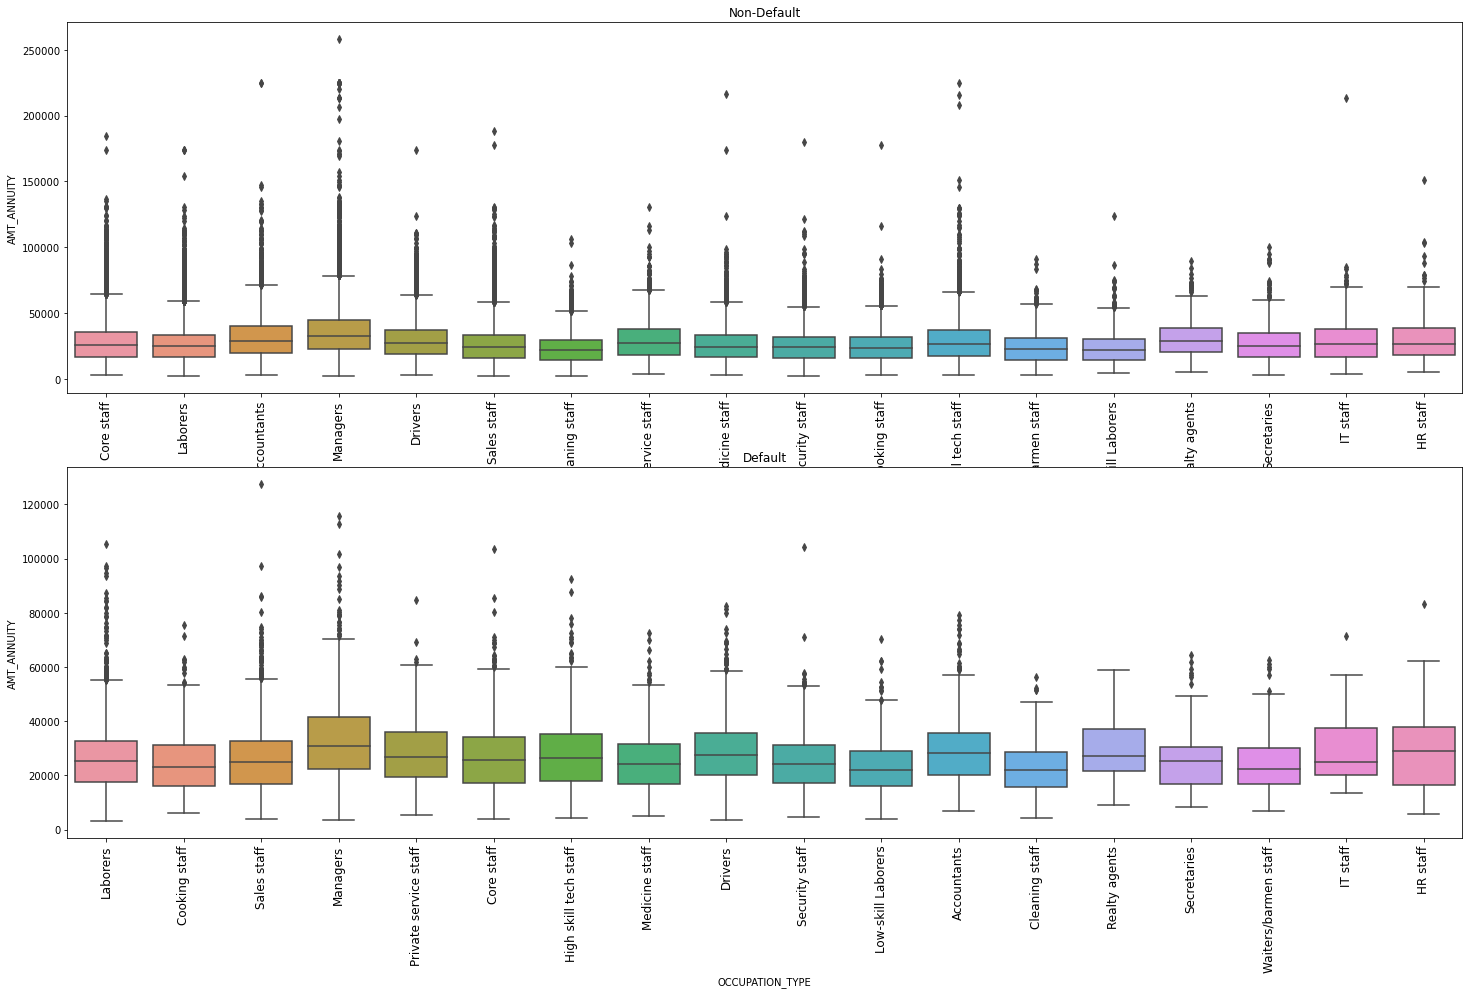

In [110]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'OCCUPATION_TYPE' , y = 'AMT_ANNUITY' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'OCCUPATION_TYPE' , y = 'AMT_ANNUITY')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

### OCCUPATION_TYPE -  AMT_CREDIT

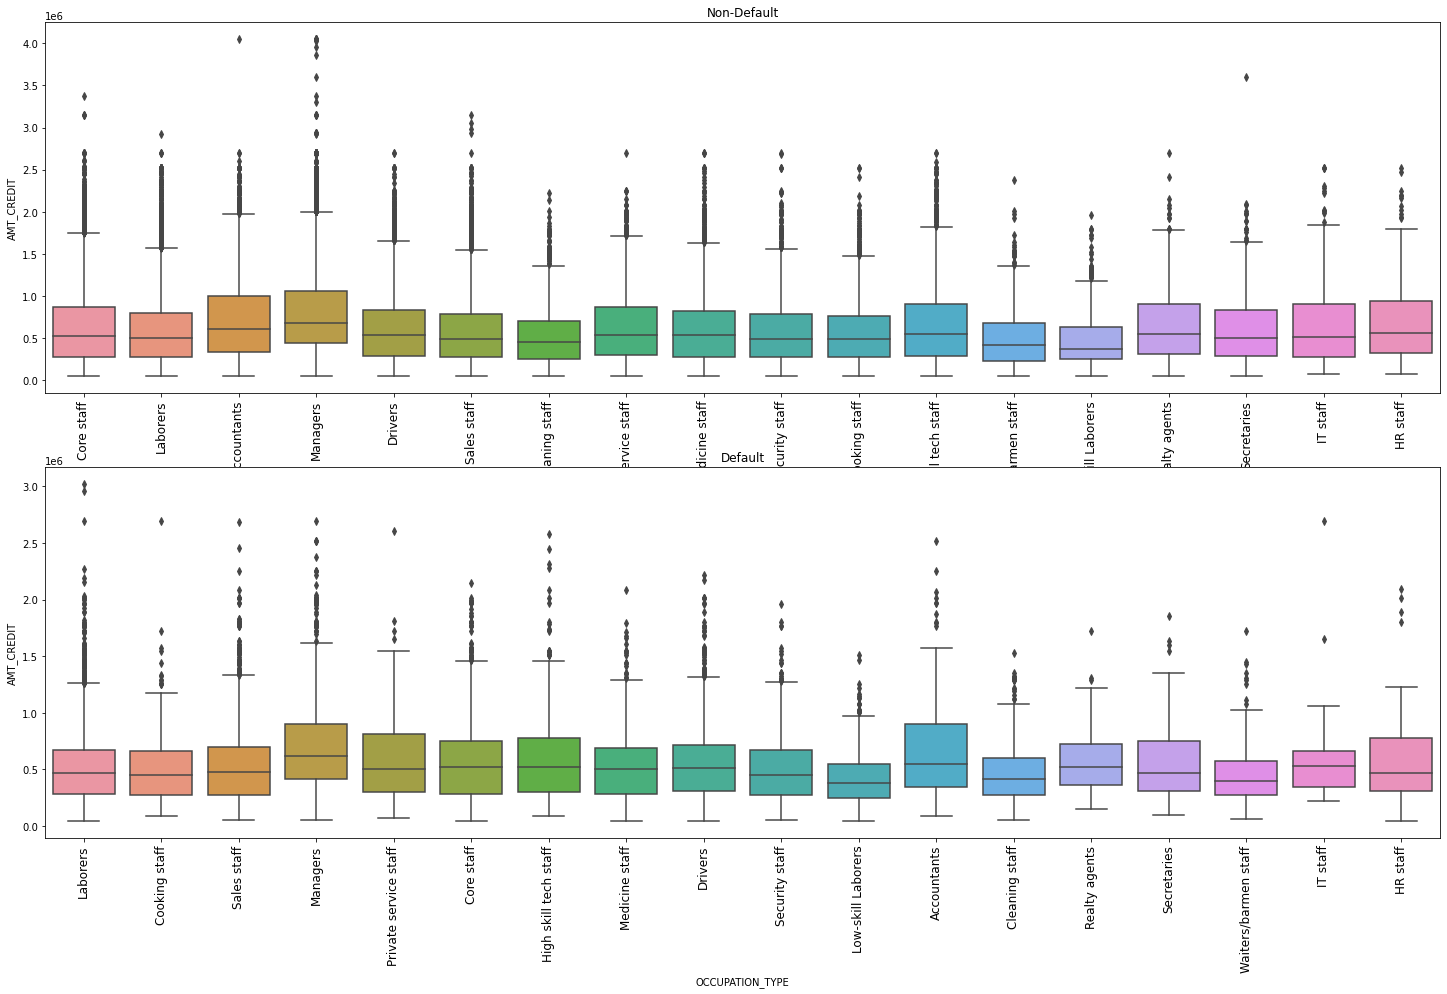

In [111]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'OCCUPATION_TYPE' , y = 'AMT_CREDIT' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'OCCUPATION_TYPE' , y = 'AMT_CREDIT')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

### NAME_INCOME_TYPE -  AMT_ANNUITY

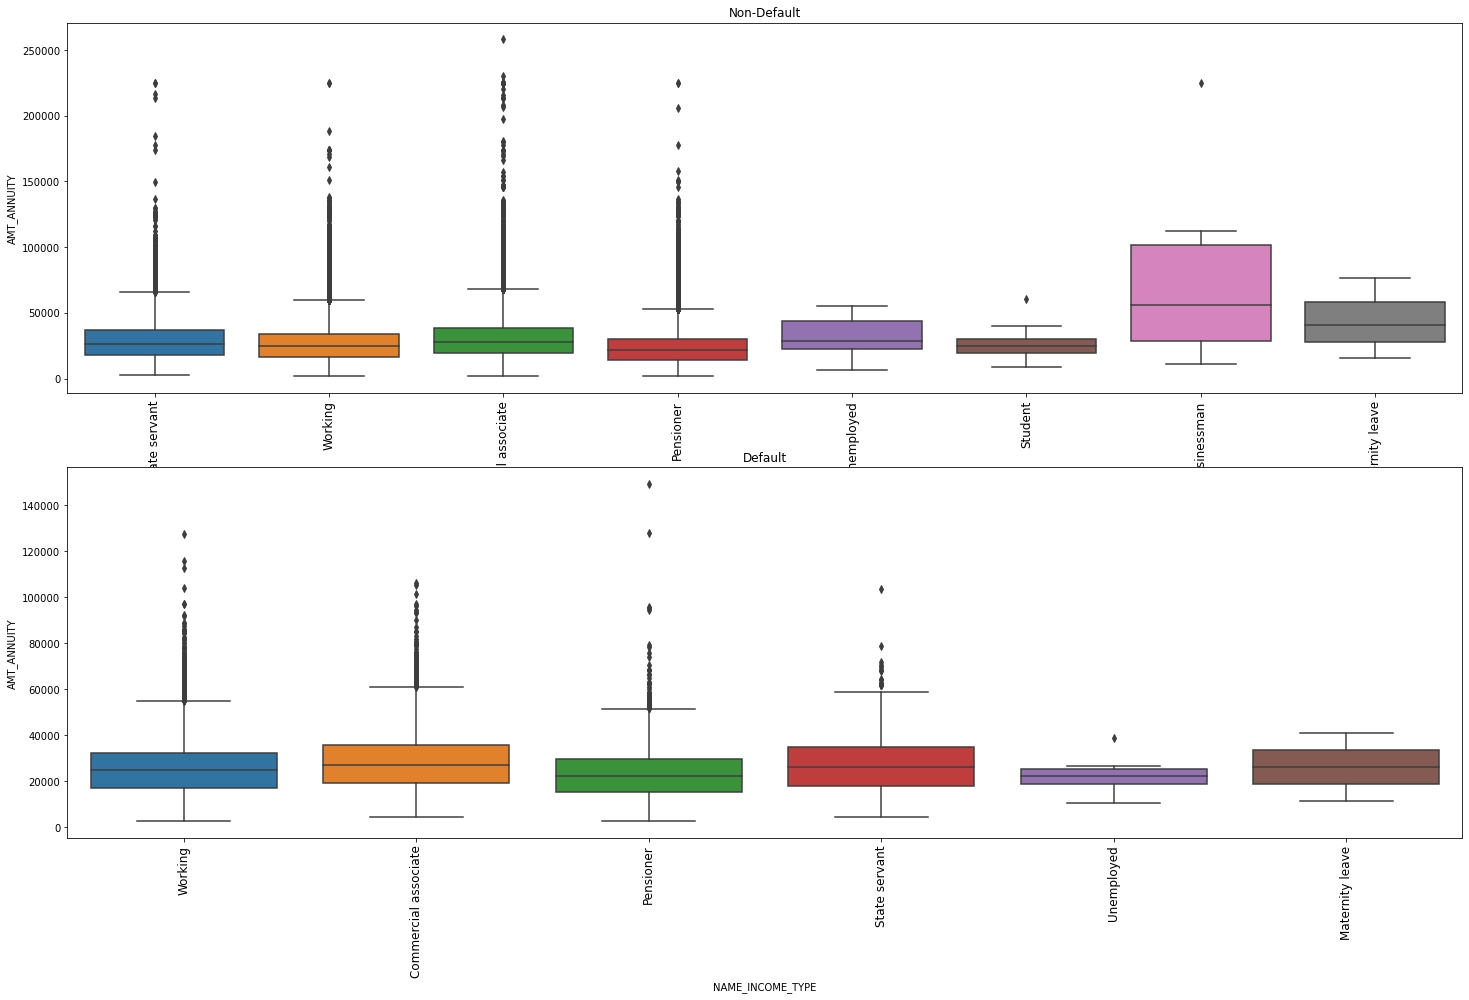

In [112]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_INCOME_TYPE' , y = 'AMT_ANNUITY' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_ANNUITY')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

### NAME_FAMILY_STATUS - AMT_CREDIT

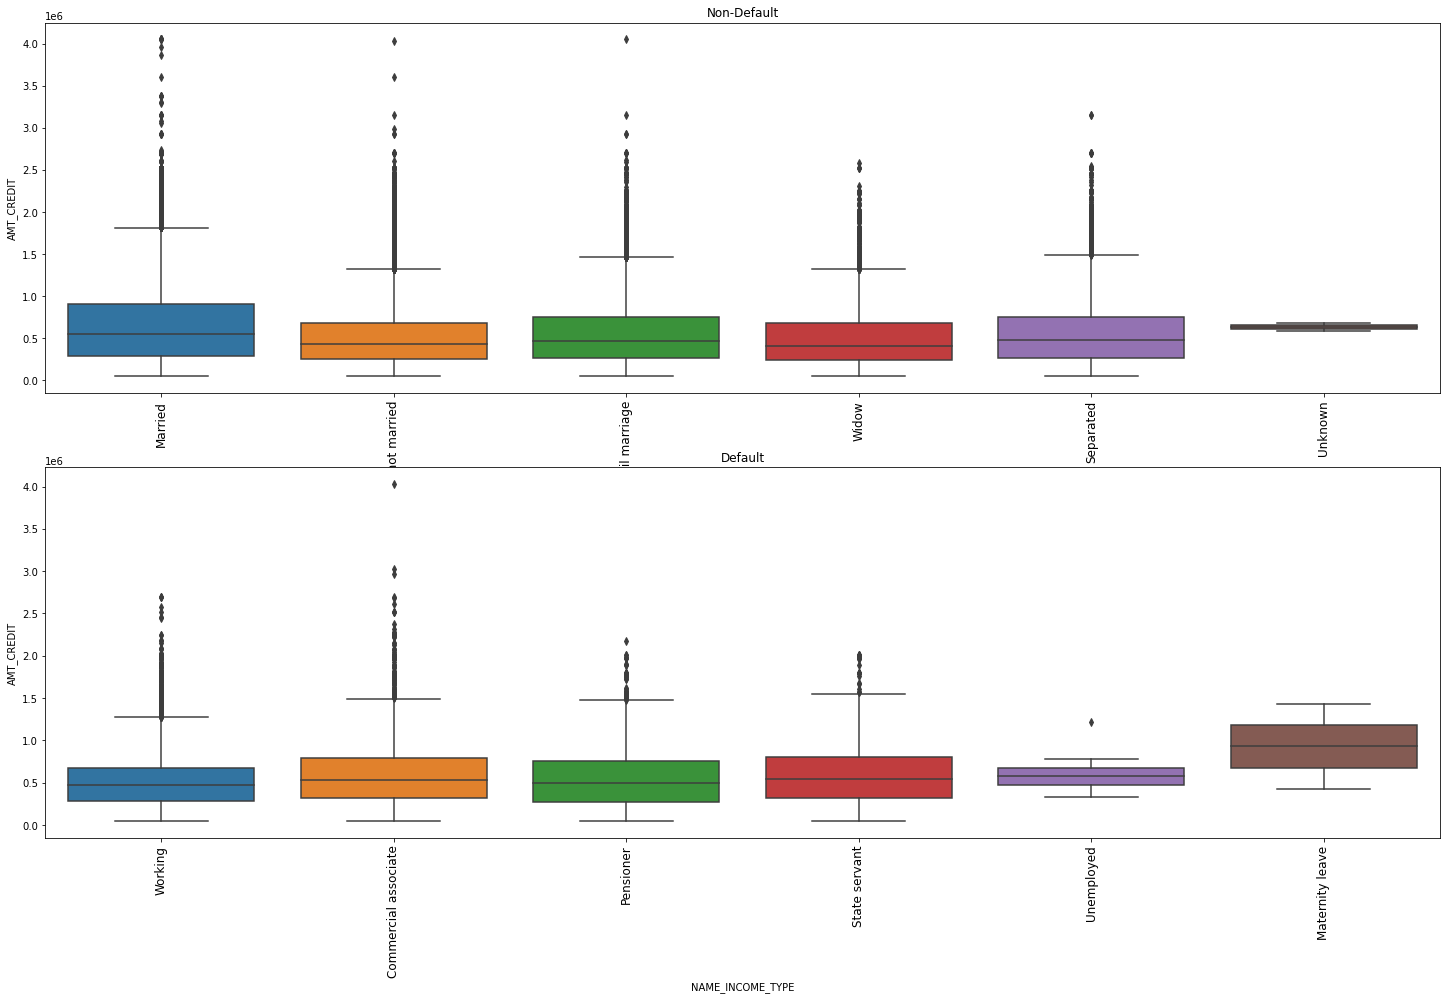

In [113]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_FAMILY_STATUS' , y = 'AMT_CREDIT' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_CREDIT')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

### NAME_EDUCATION_TYPE  -  AMT_CREDIT

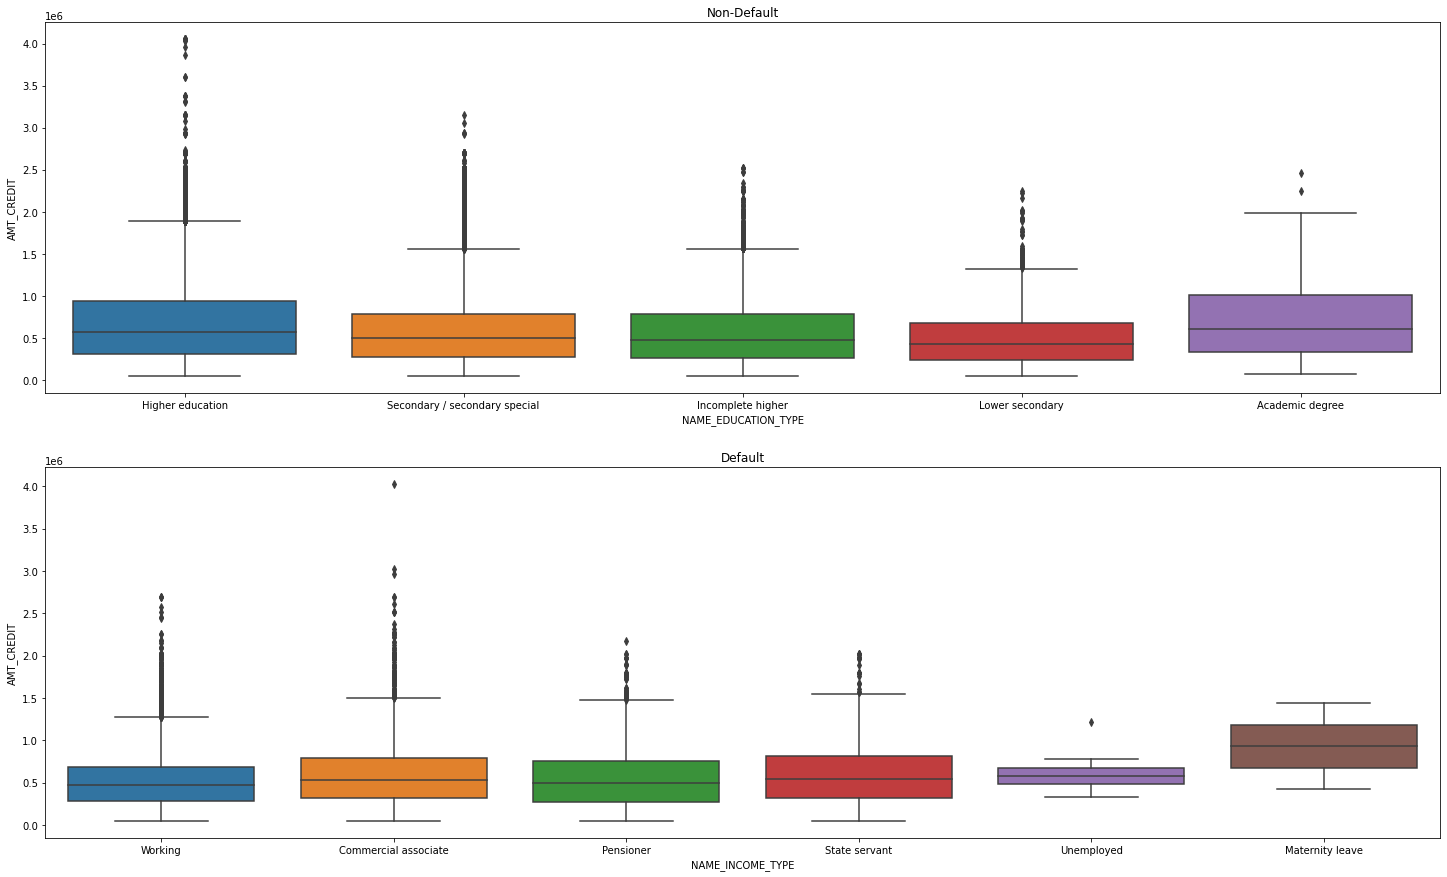

In [114]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_EDUCATION_TYPE' , y = 'AMT_CREDIT' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_CREDIT')

plt.show()

#### Insights:

### NAME_TYPE_SUITE  - AMT_CREDIT

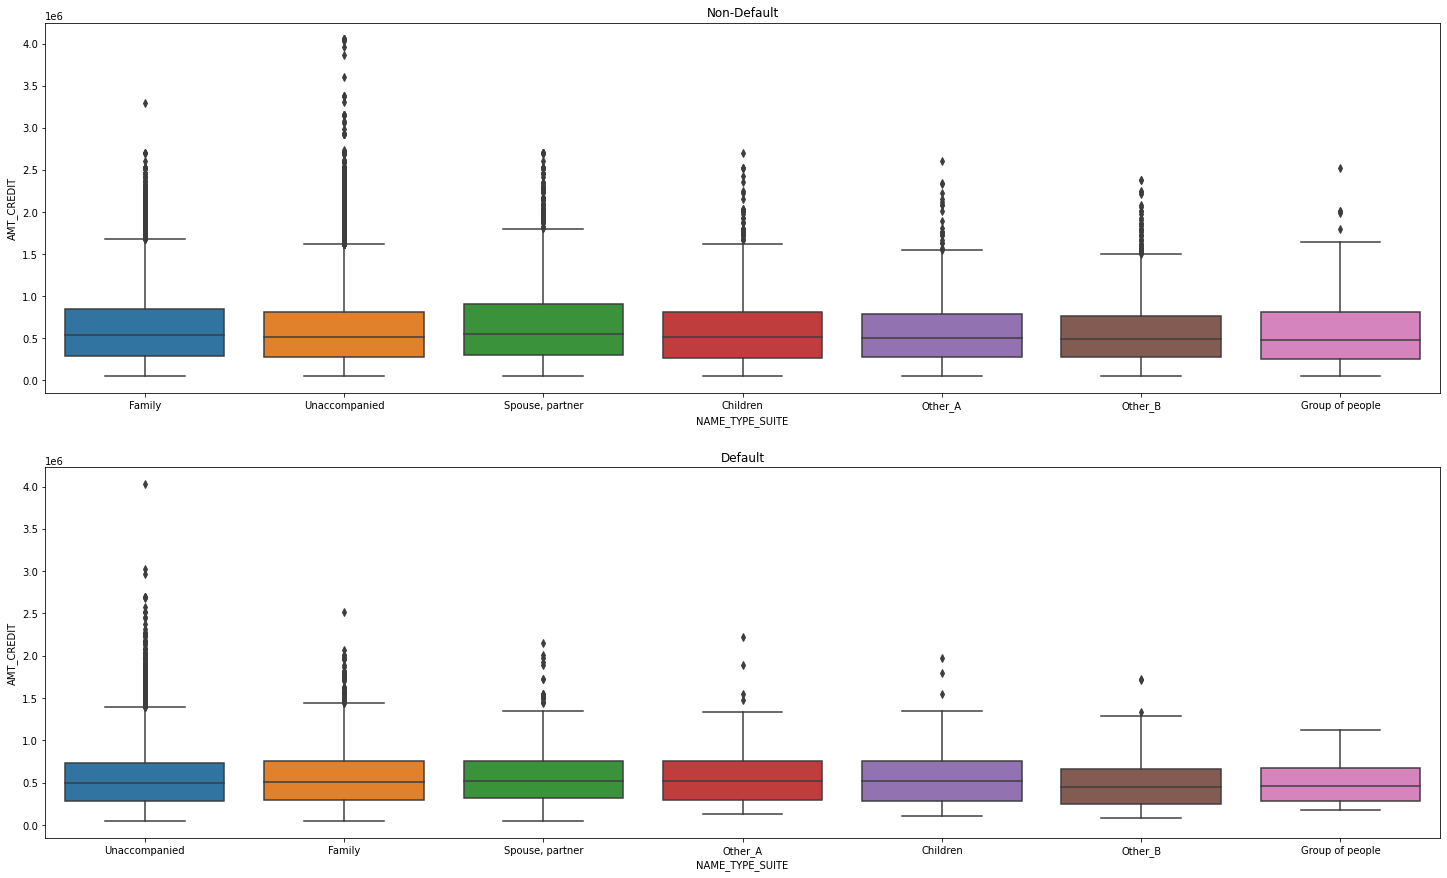

In [115]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_TYPE_SUITE' , y = 'AMT_CREDIT' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_TYPE_SUITE' , y = 'AMT_CREDIT')

plt.show()

#### Insights:

### Continuos - Continous

### Correlation

### Top 10 Correlated Variables : Target_0  - Non Defaulters

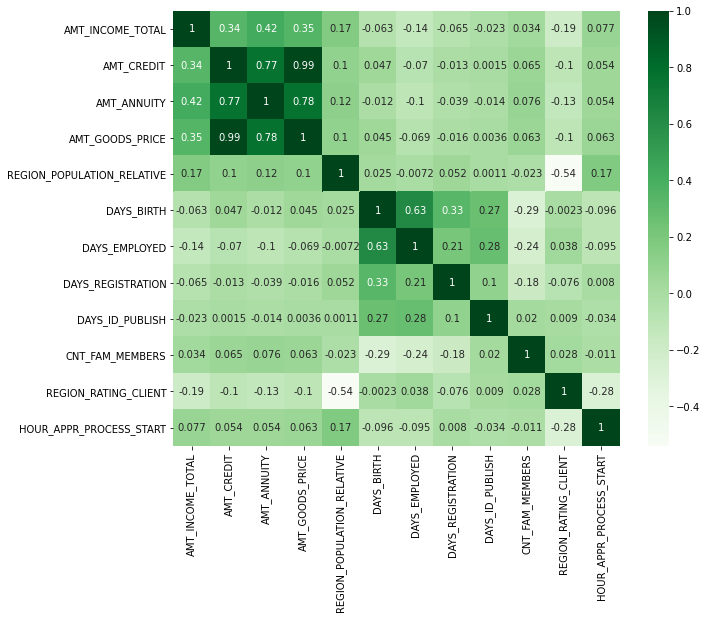

In [119]:
plt.figure(figsize=(10,8))
sns.heatmap(application_dataset_0.corr() , cmap = 'Greens' , annot = True)
plt.show()

In [122]:
application_dataset_0.corr()
corr_0 = application_dataset_0.corr()
corr_df = corr_0.where(np.triu(np.ones(corr_0.shape) , k = 1 ).astype (np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df.columns = ['VAR1' , 'VAR_2' , 'Correlation']
corr_df.dropna(subset = ['Correlation'] , inplace = True)
corr_df['Correlation'] = round(corr_df['Correlation'],2).abs()
corr_df.sort_values(by = 'Correlation' , ascending = False).head(10)

,VAR1,VAR_2,Correlation
37,AMT_GOODS_PRICE,AMT_CREDIT,0.99
38,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
25,AMT_ANNUITY,AMT_CREDIT,0.77
77,DAYS_EMPLOYED,DAYS_BIRTH,0.63
124,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.54
24,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
36,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
12,AMT_CREDIT,AMT_INCOME_TOTAL,0.34
89,DAYS_REGISTRATION,DAYS_BIRTH,0.33
113,CNT_FAM_MEMBERS,DAYS_BIRTH,0.29


### Insights:

### Top 10 Correlated Variables : Target_1 - Defaulters

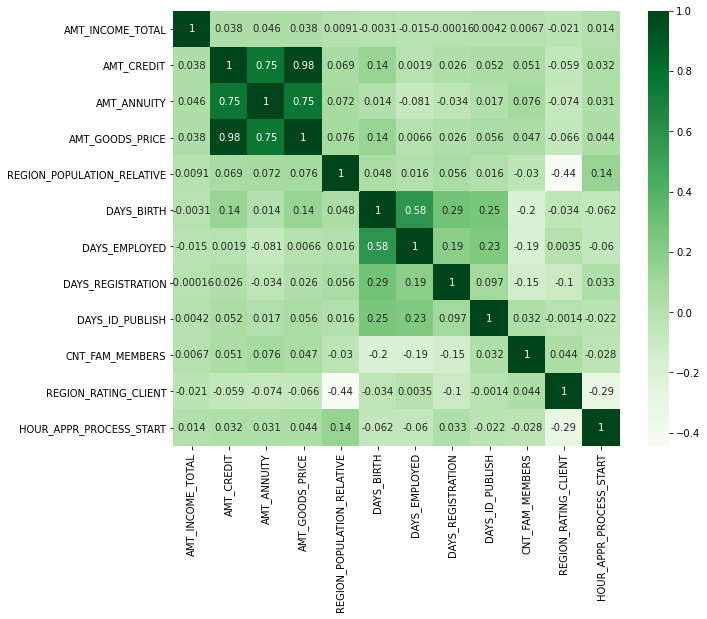

In [120]:
plt.figure(figsize=(10,8))
sns.heatmap(application_dataset_1.corr() ,cmap = 'Greens' , annot = True)
plt.show()

In [121]:
application_dataset_1.corr()
corr_1 = application_dataset_1.corr()
corr_df_1 = corr_1.where(np.triu(np.ones(corr_1.shape) , k = 1 ).astype (np.bool))
corr_df_1 = corr_df_1.unstack().reset_index()
corr_df_1.columns = ['VAR1' , 'VAR_2' , 'Correlation']
corr_df_1.dropna(subset = ['Correlation'] , inplace = True)
corr_df_1['Correlation'] = round(corr_df_1['Correlation'],2).abs()
corr_df_1.sort_values(by = 'Correlation' , ascending = False).head(10)


,VAR1,VAR_2,Correlation
37,AMT_GOODS_PRICE,AMT_CREDIT,0.99
38,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
25,AMT_ANNUITY,AMT_CREDIT,0.77
77,DAYS_EMPLOYED,DAYS_BIRTH,0.63
124,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.54
24,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
36,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
12,AMT_CREDIT,AMT_INCOME_TOTAL,0.34
89,DAYS_REGISTRATION,DAYS_BIRTH,0.33
113,CNT_FAM_MEMBERS,DAYS_BIRTH,0.29


### Insights:

In [ ]:
# Plot all the corr variable individually:

### AMT_CREDIT & AMT_INCOME_TOTAL

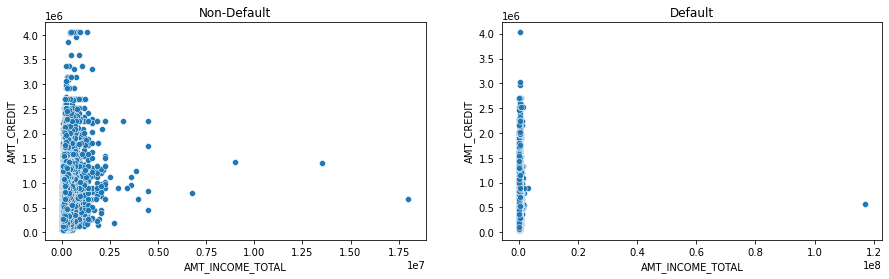

In [123]:
#Scatter plot

plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.scatterplot(data = application_dataset_0 , y = 'AMT_CREDIT', x = 'AMT_INCOME_TOTAL')
  
              
plt.subplot(1,2,2)
plt.title("Default")
sns.scatterplot(data = application_dataset_1 , y = 'AMT_CREDIT', x = 'AMT_INCOME_TOTAL')

plt.show()

#### Insights:


### Relationship between 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE' :  Non - Defaulters:

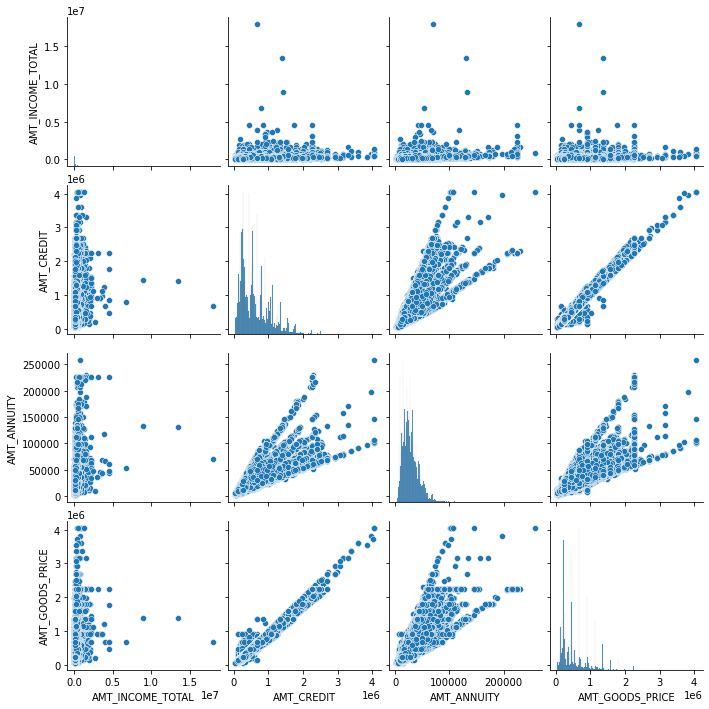

In [124]:
sns.pairplot(data = application_dataset_0 ,vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])
plt.show()

#### Insights:

### Relationship between'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'- Defaulters

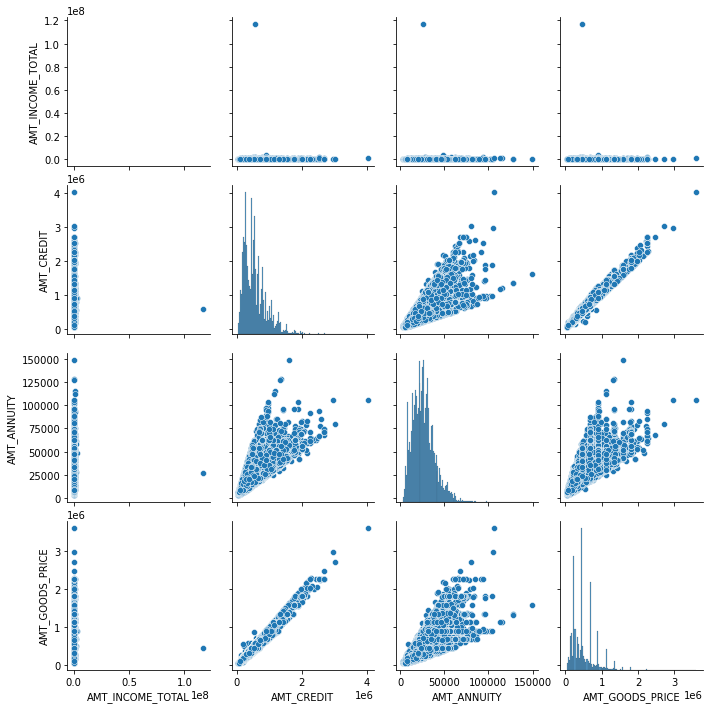

In [125]:
sns.pairplot(data = application_dataset_1 ,vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])
plt.show()

#### Insights

 ### DAYS_EMPLOYED  Vs AMT_INCOME_TOTAL

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.scatterplot(data = application_dataset_0 , x = 'DAYS_EMPLOYED' , y = 'AMT_INCOME_TOTAL')
              
plt.subplot(1,2,2)
plt.title("Default")
sns.scatterplot(data = application_dataset_1 , x = 'DAYS_EMPLOYED' , y = 'AMT_INCOME_TOTAL')

plt.show()

#### Insights:

### DAYS_EMPLOYED - AMT_ANNUITY

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.scatterplot(data = application_dataset_0 , x = 'DAYS_EMPLOYED' , y = 'AMT_ANNUITY')
              
plt.subplot(1,2,2)
plt.title("Default")
sns.scatterplot(data = application_dataset_1 , x = 'DAYS_EMPLOYED' , y = 'AMT_ANNUITY')

plt.show()

 #### Insights:

### Catergorical - Categorical

### NAME_INCOME_TYPE & CODE_GENDER :

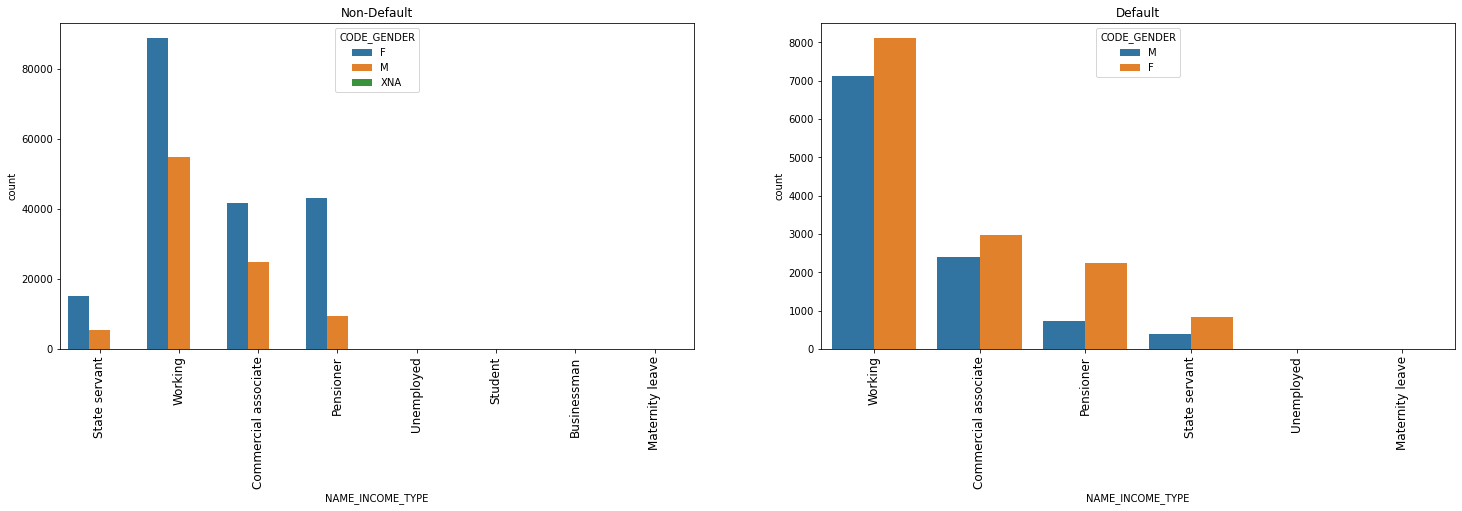

In [126]:
plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot('NAME_INCOME_TYPE', data = application_dataset_0 , hue = 'CODE_GENDER')
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot('NAME_INCOME_TYPE', data = application_dataset_1 , hue = 'CODE_GENDER')
plt.xticks(rotation = 90 , fontsize = 12) 

plt.show()

#### Insights:

### 'NAME_FAMILY_STATUS - OCCUPATION_TYPE

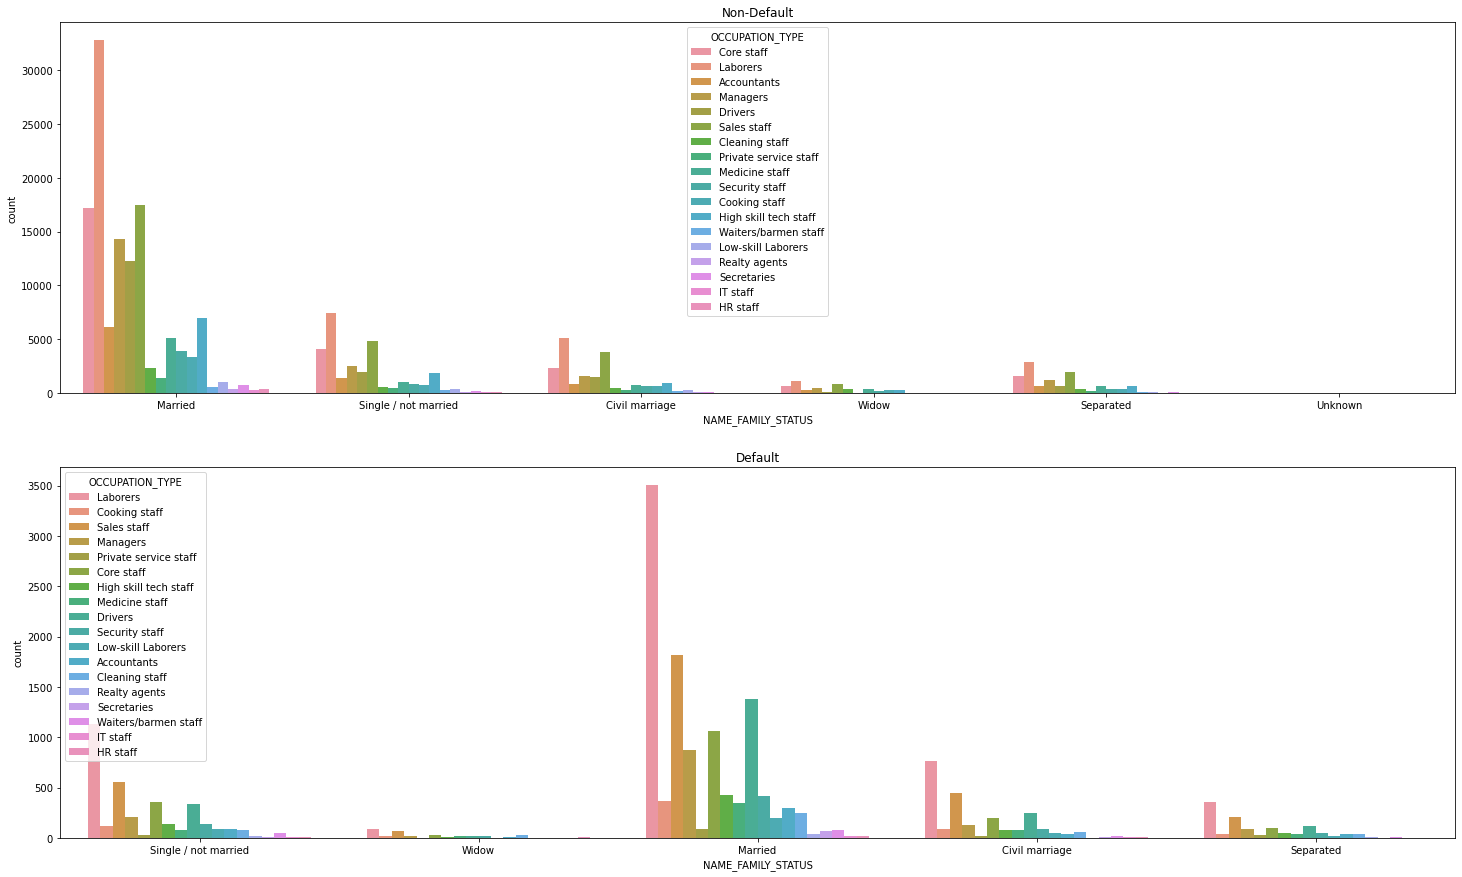

In [127]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.countplot('NAME_FAMILY_STATUS', data = application_dataset_0 ,hue = 'OCCUPATION_TYPE')

plt.subplot(2,1,2)
plt.title("Default")
sns.countplot('NAME_FAMILY_STATUS', data = application_dataset_1 ,hue = 'OCCUPATION_TYPE' )
plt.show()

#### Insights:

### NAME_EDUCATION_TYPE  - NAME_INCOME_TYPE

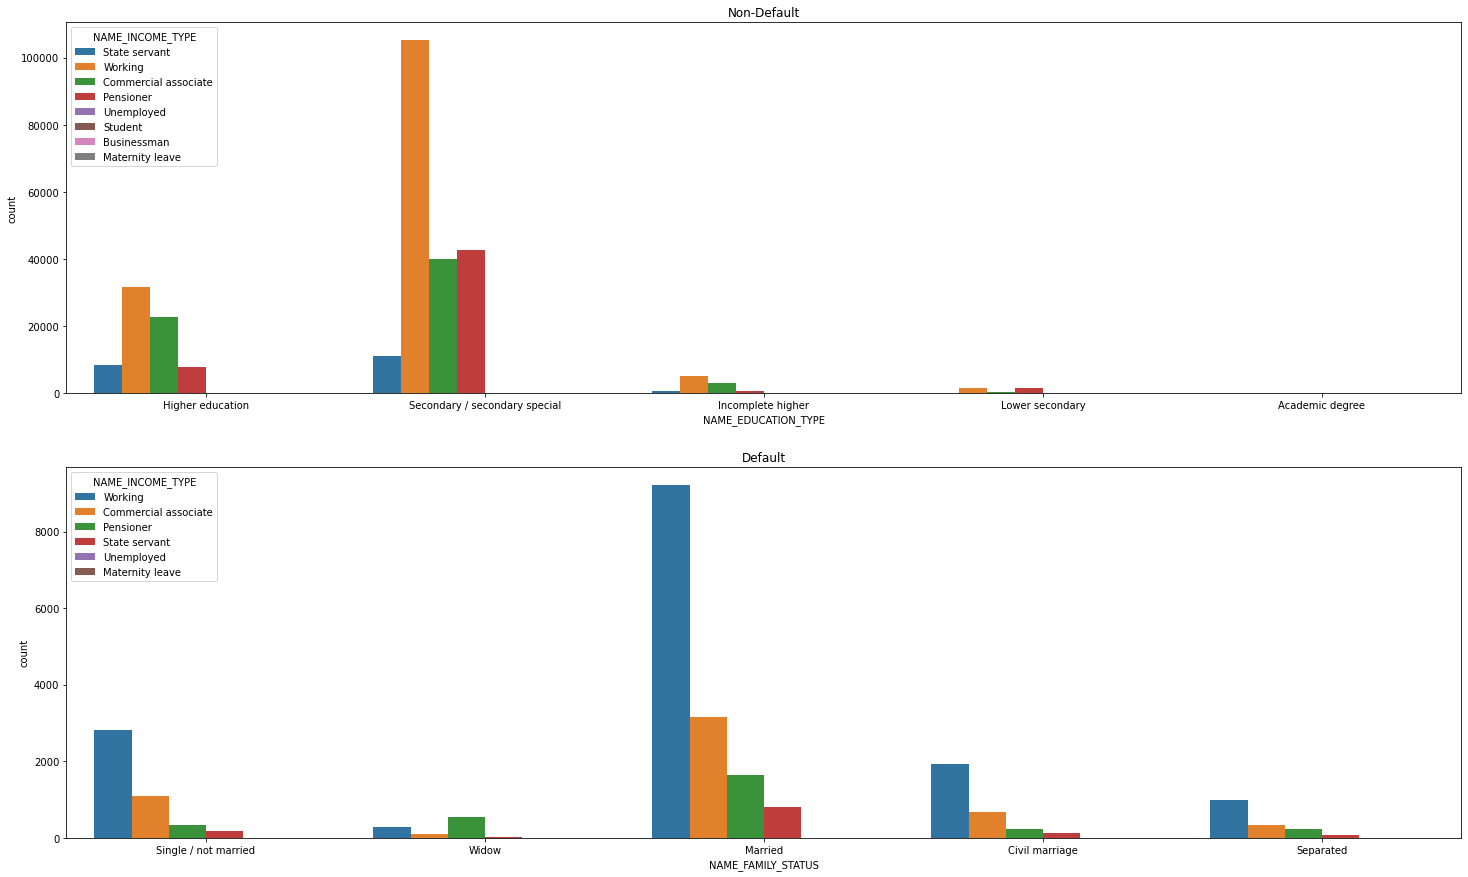

In [128]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.countplot('NAME_EDUCATION_TYPE', data = application_dataset_0 ,hue = 'NAME_INCOME_TYPE')

plt.subplot(2,1,2)
plt.title("Default")
sns.countplot('NAME_FAMILY_STATUS', data = application_dataset_1 ,hue = 'NAME_INCOME_TYPE' )
plt.show()

## Multivariate Analysis:

###  Average Credit across  Age ,Gender & Income Groups:

In [144]:
#create pivot table for age, gender and Total Income for Non-Defaulters :
 
age_non_default = pd.pivot_table(data=application_dataset_0[application_dataset_0['CODE_GENDER'] != 'XNA'], index = ['DAYS_BIRTH_range','CODE_GENDER'],
                                 columns='AMT_INCOME_TOTAL_range', values='AMT_CREDIT', 
                                 aggfunc='mean', fill_value = 0 , margins = True)
age_non_default



AMT_INCOME_TOTAL_range                 0-5L         5-10L       10L-15L  \
DAYS_BIRTH_range CODE_GENDER                                              
20-30            F            479428.153364  1.001170e+06  7.432355e+05   
                 M            486218.271847  9.804250e+05  9.017205e+05   
30-40            F            596186.971574  1.092548e+06  9.994305e+05   
                 M            606609.795772  1.099858e+06  1.123714e+06   
40-50            F            648630.012258  1.180642e+06  1.365508e+06   
                 M            669727.666040  1.130187e+06  1.219134e+06   
50-60            F            633709.139710  1.248345e+06  1.399165e+06   
                 M            671968.982553  1.115311e+06  1.464776e+06   
60 & above       F            508585.811630  1.163047e+06  9.268178e+05   
                 M            569301.775522  1.317524e+06  1.125000e+06   
All                           597787.285339  1.131772e+06  1.181413e+06   

AMT_INCOME_TOTAL_range             15L-20L     20L-25L   25L & above  \
DAYS_BIRTH_range CODE_GENDER                                           
20-30            F            6.750000e+05  1010832.75  9.534600e+05   
                 M            6.135471e+05   787500.00  1.462500e+06   
30-40            F            7.381710e+05  1425000.00  9.000000e+05   
                 M            1.515295e+06  1363093.20  1.110000e+06   
40-50            F            8.728725e+05  1109467.50  0.000000e+00   
                 M            1.577250e+06  1181250.00  1.006920e+06   
50-60            F            1.078891e+06  1350000.00  0.000000e+00   
                 M            7.147605e+05  1468800.00  1.070351e+06   
60 & above       F            0.000000e+00   976077.00  0.000000e+00   
                 M            0.000000e+00        0.00  0.000000e+00   
All                           1.148416e+06  1217556.54  1.107977e+06   

AMT_INCOME_TOTAL_range                  All  
DAYS_BIRTH_range CODE_GENDER                 
20-30            F            481070.647569  
                 M            490208.338911  
30-40            F            599594.702951  
                 M            615453.269360  
40-50            F            653137.277092  
                 M            678931.796915  
50-60            F            637435.530044  
                 M            678768.521541  
60 & above       F            510238.497691  
                 M            574270.776881  
All                           602644.481995

In [143]:
#create pivot table for age,gender and Total Income for Defaulters :

age_default = pd.pivot_table(data = application_dataset_1, index=['DAYS_BIRTH_range','CODE_GENDER'], 
                             columns='AMT_INCOME_TOTAL_range', values = 'AMT_CREDIT', aggfunc = 'mean'
                            , fill_value = 0 , margins = True)
age_default

AMT_INCOME_TOTAL_range                 0-5L         5-10L       10L-15L  \
DAYS_BIRTH_range CODE_GENDER                                              
20-30            F            446927.457765  8.621224e+05  0.000000e+00   
                 M            467699.343750  9.192273e+05  0.000000e+00   
30-40            F            555144.108105  8.556069e+05  2.517300e+06   
                 M            544351.456236  9.880044e+05  4.912110e+05   
40-50            F            609969.621552  8.661081e+05  1.173402e+06   
                 M            596669.458633  8.261545e+05  6.435390e+05   
50-60            F            622887.203237  9.765897e+05  0.000000e+00   
                 M            614794.024590  1.170095e+06  0.000000e+00   
60 & above       F            560810.829491  8.437500e+05  1.097492e+06   
                 M            548871.331288  6.684840e+05  0.000000e+00   
All                           555662.429880  9.141143e+05  1.047928e+06   

AMT_INCOME_TOTAL_range        15L-20L  25L & above            All  
DAYS_BIRTH_range CODE_GENDER                                       
20-30            F                  0            0  447539.162983  
                 M                  0            0  469732.420794  
30-40            F                  0       900000  556775.480968  
                 M             781920            0  547926.813812  
40-50            F                  0            0  611468.096200  
                 M             900000            0  599916.084449  
50-60            F             553806            0  624687.302862  
                 M                  0            0  617811.964674  
60 & above       F                  0            0  561685.182395  
                 M                  0            0  549115.438776  
All                            745242       900000  557778.337838

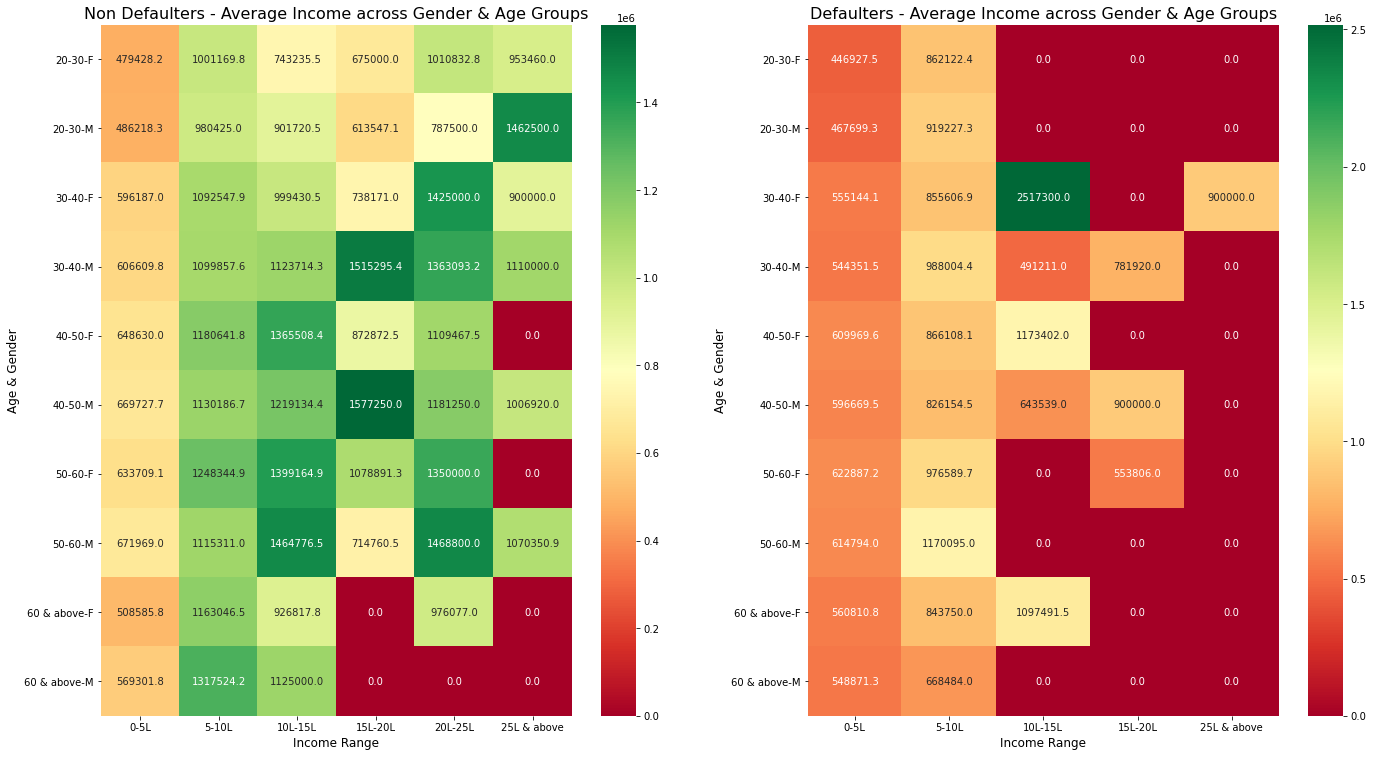

In [140]:
#  HeatMap for Age ,Gender & Income :
plt.figure(figsize=(20,12))

plt.subplot(1,2,1)          
sns.heatmap(age_non_default, annot = True, cmap = 'RdYlGn', fmt = '.1f' )
plt.title('Non Defaulters - Average Credit across Gender, Age & Income Groups', fontsize = 16)
plt.xlabel('Income Range', fontsize = 12)
plt.ylabel('Age & Gender', fontsize = 12)

plt.subplot(1,2,2) 
sns.heatmap(age_default, annot = True, cmap = 'RdYlGn', fmt = '.1f')
plt.title('Defaulters - Average Credit across Gender, Age & Income Groups', fontsize = 16)
plt.xlabel('Income Range', fontsize = 12)
plt.ylabel('Age & Gender', fontsize=12)

plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 1, top = 0.9, wspace = 0.2, hspace = 0.4)
plt.show()

In [ ]:
#### Insights:

###  Average Credit across Occupation_Type & Income Type

In [147]:
#create pivot table for OCCUPATION_TYPE, NAME_INCOME_TYPE and AMT_CREDIT for Non-Defaulters :

occupation_non_default = pd.pivot_table(data=application_dataset_0, index='OCCUPATION_TYPE',
                                 columns='NAME_INCOME_TYPE', values='AMT_CREDIT', aggfunc='mean',
                                     fill_value = 0.0, margins = True)
occupation_non_default

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Working,All
OCCUPATION_TYPE,,,,,,,,
Accountants,0.000000e+00,774711.505017,315000,0,656163.439024,180000.0,671447.626005,712090.022004
Cleaning staff,0.000000e+00,560383.028834,0,236250,543439.991803,0.0,500744.813037,514652.036020
Cooking staff,0.000000e+00,596129.115869,0,0,546791.476829,0.0,526334.673335,543520.113803
Core staff,6.750000e+05,665704.878619,810000,0,675844.463680,552520.5,586648.056157,628181.562577
Drivers,0.000000e+00,663789.850305,0,0,671248.873494,1381113.0,597551.754789,618680.601358
HR staff,0.000000e+00,698565.834975,0,0,751371.604839,0.0,662002.402672,686600.632827
High skill tech staff,0.000000e+00,695914.678245,0,0,676926.941117,0.0,615684.920306,645990.890533
IT staff,0.000000e+00,695215.147959,0,0,707286.093750,0.0,603030.139113,649925.560976
Laborers,0.000000e+00,624472.475277,0,180000,633704.054614,434993.4,556323.660765,575075.338636


In [148]:
#create pivot table for OCCUPATION_TYPE, NAME_INCOME_TYPE and AMT_CREDIT for Defaulters :

occupation_default = pd.pivot_table(data=application_dataset_1, index='OCCUPATION_TYPE', 
                                    columns='NAME_INCOME_TYPE', values='AMT_CREDIT' , aggfunc='mean',
                                   fill_value = 0.0, margins = True)
occupation_default

NAME_INCOME_TYPE,Commercial associate,Maternity leave,State servant,Working,All
OCCUPATION_TYPE,,,,,
Accountants,705594.196721,0,589740.468750,643416.967181,663798.370253
Cleaning staff,501395.142857,0,463382.735294,471359.498584,476230.057047
Cooking staff,536795.013158,0,537284.302326,490060.386853,501909.623188
Core staff,571338.303614,423000,645260.831897,562768.364476,581251.756329
Drivers,620059.110664,0,558287.272059,544332.499027,562645.289986
HR staff,764606.117647,0,433656.000000,584790.352941,661307.000000
High skill tech staff,640713.443662,0,695686.031250,563486.635227,596004.297432
IT staff,729940.500000,0,459739.285714,621861.394737,613913.691176
Laborers,572220.153501,1435500,606453.086538,520650.637508,532940.543679


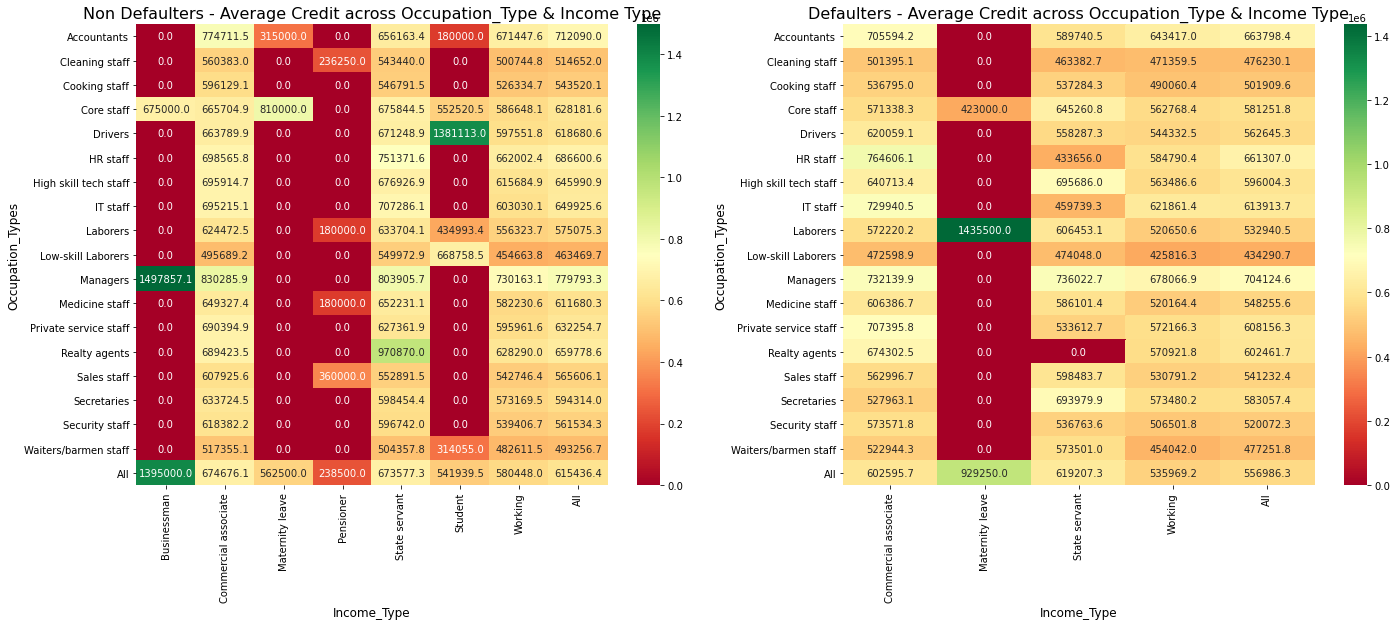

In [151]:
#  HeatMap for Credit across Education_Type & Income Type:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)          
sns.heatmap(occupation_non_default, annot = True, cmap = 'RdYlGn', fmt = '.1f' )
plt.title('Non Defaulters - Average Credit across Occupation_Type & Income Type', fontsize = 16)
plt.xlabel('Income_Type', fontsize = 12)
plt.ylabel('Occupation_Types', fontsize = 12)

plt.subplot(1,2,2)
sns.heatmap(occupation_default, annot = True, cmap = 'RdYlGn', fmt = '.1f')
plt.title('Defaulters - Average Credit across Occupation_Type & Income Type', fontsize = 16)
plt.xlabel('Income_Type', fontsize = 12)
plt.ylabel('Occupation_Types', fontsize = 12)

plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 1, top = 0.9, wspace = 0.2, hspace = 0.4)
plt.show()

#### Insights:

### Average Annuity across Family_status ,Income Range & Credit Range :

In [154]:
#create pivot table for 'NAME_FAMILY_STATUS','AMT_INCOME_TOTAL_range' ,AMT_CREDIT_range & AMT_ANNUITY for Non-Defaulters :

income_non_default = pd.pivot_table(data=application_dataset_0, index=['NAME_FAMILY_STATUS','AMT_INCOME_TOTAL_range'], 
                                    columns= 'AMT_CREDIT_range', values='AMT_ANNUITY', aggfunc='mean',
                                       fill_value = 0.0)
income_non_default

AMT_CREDIT_range                                     0-5L         5-10L  \
NAME_FAMILY_STATUS   AMT_INCOME_TOTAL_range                               
Civil marriage       0-5L                    17556.915464  30154.553033   
                     5-10L                   23471.653846  39875.857143   
                     10L-15L                     0.000000  36201.600000   
                     15L-20L                 14181.750000  38322.000000   
                     20L-25L                     0.000000      0.000000   
                     25L & above                 0.000000      0.000000   
Married              0-5L                    18401.775491  31796.897989   
                     5-10L                   26267.836634  43824.664165   
                     10L-15L                 17009.100000  43632.947368   
                     15L-20L                 15184.500000  38345.142857   
                     20L-25L                 24986.250000  50289.000000   
                     25L & above              9000.000000  50200.500000   
Separated            0-5L                    16986.112936  29662.963459   
                     5-10L                   31185.675000  43868.663265   
                     10L-15L                 17509.500000  57519.000000   
                     15L-20L                     0.000000  21672.000000   
                     20L-25L                     0.000000  52132.500000   
Single / not married 0-5L                    17544.408558  30649.522422   
                     5-10L                   26072.427273  42323.072034   
                     10L-15L                 17509.500000  41855.400000   
                     15L-20L                 16706.250000  53329.500000   
                     20L-25L                     0.000000      0.000000   
                     25L & above             47749.500000      0.000000   
Unknown              0-5L                        0.000000  31500.000000   
Widow                0-5L                    15933.122532  27538.921680   
                     5-10L                   17815.500000  42249.750000   
                     10L-15L                     0.000000  41454.000000   
                     15L-20L                     0.000000  22356.000000   

AMT_CREDIT_range                                   10L-15L       15L-20L  \
NAME_FAMILY_STATUS   AMT_INCOME_TOTAL_range                                
Civil marriage       0-5L                     41723.273447  52038.356828   
                     5-10L                    50962.097015  58985.678571   
                     10L-15L                  76225.500000      0.000000   
                     15L-20L                      0.000000      0.000000   
                     20L-25L                  41692.500000      0.000000   
                     25L & above             117369.000000      0.000000   
Married              0-5L                     42267.189510  52331.715806   
                     5-10L                    55001.060575  63448.394472   
                     10L-15L                  58080.568966  80172.000000   
                     15L-20L                  50948.000000  67803.750000   
                     20L-25L                  60852.500000  49927.500000   
                     25L & above                  0.000000  61132.500000   
Separated            0-5L                     41375.642225  52938.852159   
                     5-10L                    51564.735849  63383.538462   
                     10L-15L                  45865.500000  46611.000000   
                     15L-20L                  79281.000000      0.000000   
                     20L-25L                      0.000000      0.000000   
Single / not married 0-5L                     42913.337989  52718.329159   
                     5-10L                    60608.433673  60036.051724   
                     10L-15L                  61118.250000  66525.000000   
                     15L-20L                      0.000000  62698.500000   
 

In [157]:
#create pivot table for 'NAME_FAMILY_STATUS','AMT_INCOME_TOTAL_range' ,AMT_CREDIT_range & AMT_ANNUITY for Defaulters :
income_default = pd.pivot_table(data=application_dataset_1, index=['NAME_FAMILY_STATUS','AMT_INCOME_TOTAL_range'], 
                                columns= 'AMT_CREDIT_range', values='AMT_ANNUITY', aggfunc='mean', fill_value = 0.0)
                               
income_default

AMT_CREDIT_range                                     0-5L         5-10L  \
NAME_FAMILY_STATUS   AMT_INCOME_TOTAL_range                               
Civil marriage       0-5L                    18340.199460  30991.571966   
                     5-10L                   30368.250000  37306.125000   
                     10L-15L                 17437.500000  28017.000000   
                     25L & above                 0.000000  48825.000000   
Married              0-5L                    19360.647757  32100.987025   
                     5-10L                   24670.431818  41847.500000   
                     10L-15L                 50463.000000  41661.000000   
                     15L-20L                     0.000000  49276.500000   
Separated            0-5L                    18395.647871  29934.816832   
                     5-10L                   10719.000000  34237.500000   
Single / not married 0-5L                    18691.704797  31461.989635   
                     5-10L                   23484.750000  42267.375000   
Widow                0-5L                    16199.452096  26780.379310   
                     5-10L                   24223.500000      0.000000   

AMT_CREDIT_range                                  10L-15L       15L-20L  \
NAME_FAMILY_STATUS   AMT_INCOME_TOTAL_range                               
Civil marriage       0-5L                    40804.233871  51203.000000   
                     5-10L                   43362.000000  58614.750000   
                     10L-15L                     0.000000      0.000000   
                     25L & above                 0.000000      0.000000   
Married              0-5L                    40749.909628  51629.961039   
                     5-10L                   50526.000000  60632.100000   
                     10L-15L                 42000.000000      0.000000   
                     15L-20L                     0.000000      0.000000   
Separated            0-5L                    41465.642202  48626.021739   
                     5-10L                   44461.500000  46404.000000   
Single / not married 0-5L                    40111.269231  50699.250000   
                     5-10L                   42455.571429  55777.500000   
Widow                0-5L                    40497.657534  56899.636364   
                     5-10L                       0.000000      0.000000   

AMT_CREDIT_range                                  20L-25L  25L & above  
NAME_FAMILY_STATUS   AMT_INCOME_TOTAL_range                             
Civil marriage       0-5L                    64309.500000      88519.5  
                     5-10L                       0.000000          0.0  
                     10L-15L                     0.000000          0.0  
                     25L & above                 0.000000          0.0  
Married              0-5L                    62182.306452      69667.5  
                     5-10L                   60586.500000      76230.0  
                     10L-15L                     0.000000      93420.0  
                     15L-20L                     0.000000          0.0  
Separated            0-5L                    54985.500000      79816.5  
                     5-10L                       0.000000          0.0  
Single / not married 0-5L                    59488.200000      84838.5  
                     5-10L                   59431.500000      66532.5  
Widow                0-5L                    57219.750000      66532.5  
                     5-10L                       0.000000          0.0

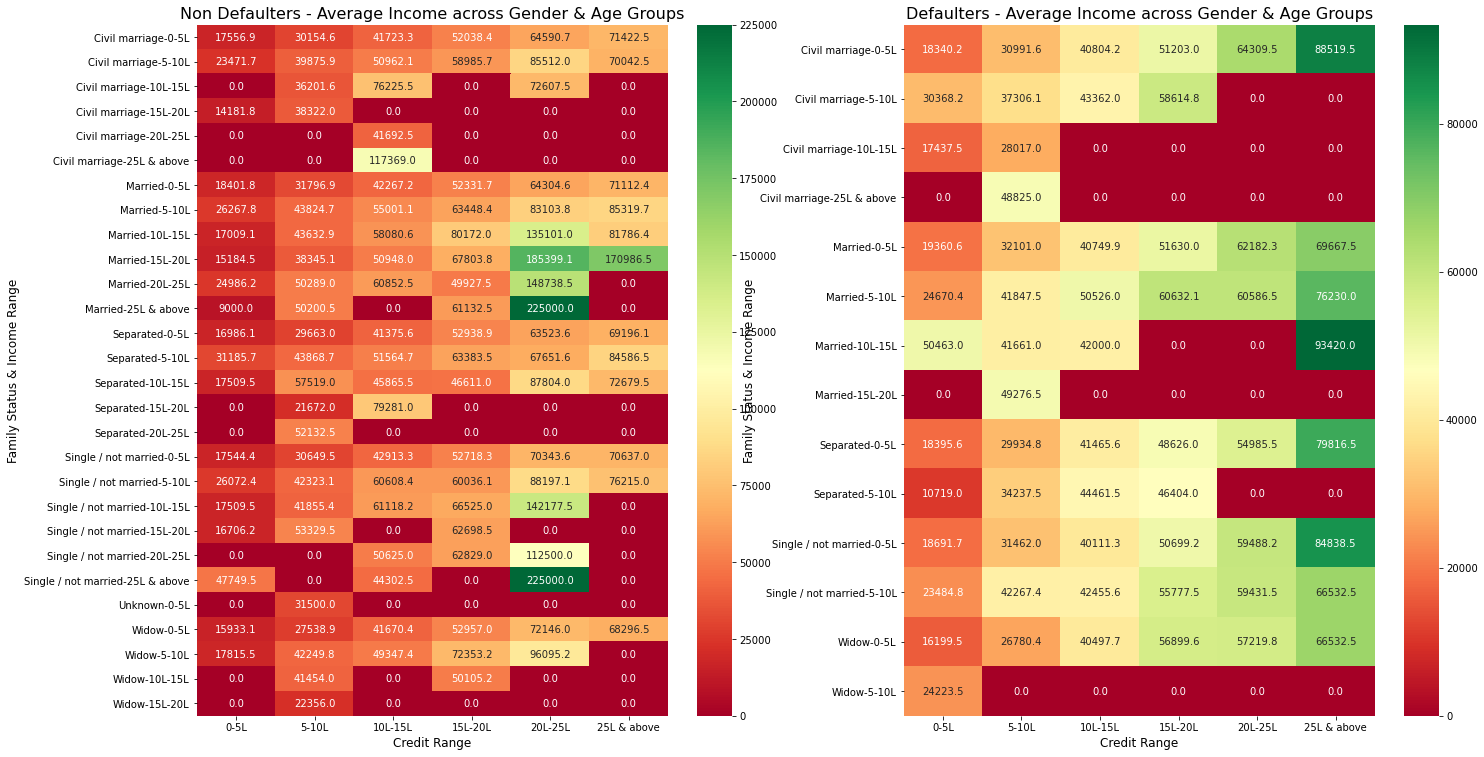

In [160]:
plt.figure(figsize=(20,12))

plt.subplot(1,2,1)          
sns.heatmap(income_non_default, annot = True, cmap = 'RdYlGn', fmt = '.1f' )
plt.title('Non Defaulters - Average Income across Gender & Age Groups', fontsize = 16)
plt.xlabel('Credit Range', fontsize = 12)
plt.ylabel('Family Status & Income Range', fontsize = 12)

plt.subplot(1,2,2) 
sns.heatmap(income_default, annot = True, cmap = 'RdYlGn', fmt = '.1f')
plt.title('Defaulters - Average Income across Gender & Age Groups', fontsize = 16)
plt.xlabel('Credit Range', fontsize = 12)
plt.ylabel('Family Status & Income Range', fontsize=12)

plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 1, top = 0.9, wspace = 0.2, hspace = 0.4)
plt.show()

#### Insights:


## Read Previous_Application.CSV Files from Dataset Directory

In [161]:
previous_file_path = os.path.join(os.getcwd(), os.getcwd()+"/Datasets", "previous_application.csv")

In [162]:
previous_file_path

'C:\\Users\\Gayathri\\Desktop\\UpGrad\\CREDIT-EDA\\Credit-EDA/Datasets\\previous_application.csv'

In [163]:
previous_dataset = pd.read_csv(previous_file_path)

In [164]:
previous_dataset.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Structure of the Dataset :

In [165]:
# Finding the Total records,Column, emtries & data types:
previous_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [166]:
# Finding the no.of Columns & Rows in the dataset:
previous_dataset.shape

(1670214, 37)

In [167]:
# Columns in the dataset
previous_dataset.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [168]:
# Statistical Summary of the numerical columns:
previous_dataset.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### From the Shape,We Can See that 1670214 rows and 37 columns

### Missing values Identification:



### 1 . Calculate the Missing values percentage formula = (missing values in each row/ total rows) * 100 for each and every column.

In [ ]:
missing_values_previous = (previous_dataset.isnull().sum()/len(previous_dataset))*100

In [ ]:
missing_values_previous

#### RATE_INTEREST_PRIMARY          99.643698
#### RATE_INTEREST_PRIVILEGED       99.643698

#### Need to understand if the specific variables data helps in Accepting or Rejecting the Loan.

In [169]:
## drop the columns whenever missing values greater than 50% because we cant use these for analysis

columns_to_drop_previous = previous_dataset.columns[previous_dataset.isnull().sum() >= (0.50*len(previous_dataset))]
len(columns_to_drop_previous)

4

In [170]:
previous_dataset.drop(columns_to_drop_previous, inplace = True, axis = 1)

In [171]:
previous_dataset.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### Eliminate the records if missing values percentage greater  than 0% and less than or equal to 5%.
### since these are very less records proportion to total records,we can eliminate the records..!!

In [ ]:
#Five_percentage_columns_previous = previous_dataset.columns[(previous_dataset.isnull().sum() <= (0.05*len(previous_dataset)))&(previous_dataset.isnull().sum() > (0*len(previous_dataset)))]

In [ ]:
#Five_percentage_columns_previous

In [ ]:
## verify the above records drop the above columns wherever it is null.
#(previous_dataset.isnull().sum()/len(previous_dataset))*100

In [ ]:
## drop the missing values records for the above columns 
## columns used : ['AMT_CREDIT', 'PRODUCT_COMBINATION']
#previous_dataset = previous_dataset.dropna(subset=Five_percentage_columns_previous).reset_index(drop=True)

In [ ]:
#previous_dataset.head()

In [ ]:
previous_dataset.describe()

## 3. Quality Check : 

### 3.1 Sanilty check - Conversion of negative to positive values:

In [172]:
#DAYS_DECISION,SELLERPLACE_AREA,DAYS_FIRST_DRAWING
#previous_dataset['AMT_DOWN_PAYMENT'] = previous_dataset['AMT_DOWN_PAYMENT'].abs()
#previous_dataset['RATE_DOWN_PAYMENT'] = previous_dataset['RATE_DOWN_PAYMENT'].abs()
previous_dataset['DAYS_FIRST_DRAWING'] = previous_dataset['DAYS_FIRST_DRAWING'].abs()
previous_dataset['DAYS_FIRST_DUE'] = previous_dataset['DAYS_FIRST_DUE'].abs()
previous_dataset['DAYS_LAST_DUE'] = previous_dataset['DAYS_LAST_DUE'].abs()
previous_dataset['DAYS_LAST_DUE_1ST_VERSION'] = previous_dataset['DAYS_LAST_DUE_1ST_VERSION'].abs()
previous_dataset['DAYS_TERMINATION'] = previous_dataset['DAYS_TERMINATION'].abs()
previous_dataset['DAYS_DECISION'] = previous_dataset['DAYS_DECISION'].abs()
previous_dataset['SELLERPLACE_AREA'] = previous_dataset['SELLERPLACE_AREA'].abs()

## Missing values Imputation for categorical Variables:

In [ ]:
## identify the categorical columns
#categorical_columns_previous = previous_dataset.select_dtypes(include=["bool","object","category"]).columns

In [ ]:
#categorical_columns_previous

In [ ]:
## Null percentage for categorical columns
#((previous_dataset[categorical_columns_previous].isnull().sum())/len(previous_dataset))*100

#### No Missing values present in the Categorical Columns

## Missing values Imputation for numerical columns:

In [ ]:
#numerical_columns_previous = previous_dataset.select_dtypes(include=["number"]).columns

In [ ]:
#numerical_columns_previous

In [ ]:
#((previous_dataset[numerical_columns_previous].isnull().sum())/len(previous_dataset))*100

## 4. Merging Application & Previous datasets:

Contract Status Values & COunts : 
 Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64


<AxesSubplot:>

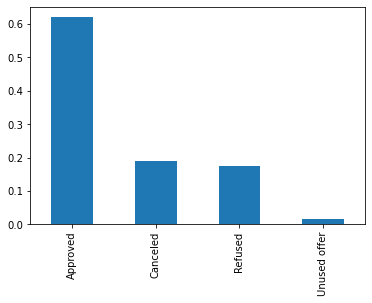

In [173]:
print("Contract Status Values & COunts : \n" , previous_dataset['NAME_CONTRACT_STATUS'].value_counts(normalize = True) * 100 )
previous_dataset['NAME_CONTRACT_STATUS'].value_counts(normalize = True).plot.bar() 

### Merging the datasets:

In [174]:
merged_df = pd.merge(application_dataset,previous_dataset , how = 'left' , on = 'SK_ID_CURR' , suffixes = ('_current' , '_previous'))
merged_df.head()

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [ ]:
### Divide / Segment Dataset into 4 subsets:

In [ ]:
#Approved_dataset = previous_dataset[previous_dataset['NAME_CONTRACT_STATUS'] == 'Approved']
#Refused_dataset = previous_dataset[previous_dataset['NAME_CONTRACT_STATUS']=='Refused']
#Canceled_dataset = previous_dataset[previous_dataset['NAME_CONTRACT_STATUS']== 'Canceled']
#Unused_offer_dataset = previous_dataset[previous_dataset['NAME_CONTRACT_STATUS']=='Unused offer']

In [ ]:
#Approved_dataset.head()

In [ ]:
#Refused_dataset.head()

In [ ]:
#Canceled_dataset.head()

In [ ]:
#Unused_offer_dataset.head()

### 4.1 Univariate Analysis

### Categorical Columns:

In [ ]:
previous_dataset.select_dtypes(include=["object"]).columns

###  NAME_CASH_LOAN_PURPOSE

In [ ]:
plt.figure(figsize = (25,10))

sns.countplot(previous_dataset['NAME_CASH_LOAN_PURPOSE'], hue = previous_dataset['NAME_CONTRACT_STATUS'])
plt.xticks(rotation = 90 , fontsize = 12)

plt.show()

#### Insights :

### NAME_GOODS_CATEGORY

In [ ]:
plt.figure(figsize = (25,5))

sns.countplot(previous_dataset['NAME_GOODS_CATEGORY'],hue = previous_dataset['NAME_CONTRACT_STATUS'])
plt.xticks(rotation = 90 , fontsize = 12)

plt.show()

#### Insights :

### WEEKDAY_APPR_PROCESS_START,NAME_CONTRACT_STATUS

In [ ]:
plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
sns.countplot(previous_dataset['WEEKDAY_APPR_PROCESS_START'],hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.subplot(1,2,2)
sns.countplot(previous_dataset['NAME_CONTRACT_STATUS'],hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.show()

### NAME_CONTRACT_TYPE , NAME_PAYMENT_TYPE' 

In [ ]:
plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
sns.countplot(previous_dataset['NAME_CONTRACT_TYPE'] , hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.subplot(1,2,2)
sns.countplot(previous_dataset['NAME_PAYMENT_TYPE'] , hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.show()

#### Insights :

### CODE_REJECT_REASON','NAME_TYPE_SUITE'

In [ ]:
plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
sns.countplot(previous_dataset['CODE_REJECT_REASON'] , hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.subplot(1,2,2)
sns.countplot(previous_dataset['NAME_TYPE_SUITE'] , hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.show()

#### Insights :

### 'NAME_CLIENT_TYPE',  'NAME_PORTFOLIO'

In [ ]:
plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
sns.countplot(previous_dataset['NAME_CLIENT_TYPE'] , hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.subplot(1,2,2)
sns.countplot(previous_dataset['NAME_PORTFOLIO'] , hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.show()

#### Insights :

###  NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',

In [ ]:
plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
sns.countplot(previous_dataset['NAME_PRODUCT_TYPE'] , hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.subplot(1,2,2)
sns.countplot(previous_dataset['CHANNEL_TYPE'], hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.show()

#### Insights :

### NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'

In [ ]:
plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
sns.countplot(previous_dataset['NAME_SELLER_INDUSTRY'] , hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.subplot(1,2,2)
sns.countplot(previous_dataset['NAME_YIELD_GROUP'], hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.show()

#### Insights :

### 'PRODUCT_COMBINATION',FLAG_LAST_APPL_PER_CONTRACT'

In [ ]:
plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
sns.countplot(previous_dataset['PRODUCT_COMBINATION'], hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.subplot(1,2,2)
sns.countplot(previous_dataset['FLAG_LAST_APPL_PER_CONTRACT'], hue = previous_dataset['NAME_CONTRACT_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12)

plt.show()

#### Insights :

### Numerical Columns

In [ ]:
previous_dataset.select_dtypes(include=["number"]).columns

### AMT_ANNUITY , AMT_APPLICATION

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.histplot(data = previous_dataset, x = 'AMT_ANNUITY' , hue = 'NAME_CONTRACT_STATUS' )

plt.subplot(1,2,2)
sns.histplot(data = previous_dataset, x = 'AMT_APPLICATION' , hue = 'NAME_CONTRACT_STATUS' )

plt.show()

#### Insights :

### AMT_CREDIT', 'AMT_DOWN_PAYMENT'

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.histplot(data = previous_dataset, x = 'AMT_CREDIT' , hue = 'NAME_CONTRACT_STATUS' )

plt.subplot(1,2,2)
sns.histplot(data = previous_dataset, x = 'AMT_DOWN_PAYMENT' , hue = 'NAME_CONTRACT_STATUS' )

plt.show()

#### Insights :

### AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START'

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.histplot(data = previous_dataset, x = 'AMT_GOODS_PRICE' , hue = 'NAME_CONTRACT_STATUS' )

plt.subplot(1,2,2)
sns.histplot(data = previous_dataset, x = 'HOUR_APPR_PROCESS_START' , hue = 'NAME_CONTRACT_STATUS' )

plt.show()

#### Insights :

### 'NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT'

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.histplot(data = previous_dataset, x = 'NFLAG_LAST_APPL_IN_DAY' , hue = 'NAME_CONTRACT_STATUS' )

plt.subplot(1,2,2)
sns.histplot(data = previous_dataset, x = 'RATE_DOWN_PAYMENT' , hue = 'NAME_CONTRACT_STATUS' )

plt.show()

#### Insights :

### RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.histplot(data = previous_dataset, x = 'RATE_INTEREST_PRIMARY' , hue = 'NAME_CONTRACT_STATUS' )

plt.subplot(1,2,2)
sns.histplot(data = previous_dataset, x = 'RATE_INTEREST_PRIVILEGED' , hue = 'NAME_CONTRACT_STATUS' )

plt.show()

#### Insights :

### 'DAYS_DECISION', 'SELLERPLACE_AREA'     

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.histplot(data = previous_dataset, x = 'DAYS_DECISION' , hue = 'NAME_CONTRACT_STATUS' )

plt.subplot(1,2,2)
sns.histplot(data = previous_dataset, x = 'SELLERPLACE_AREA' , hue = 'NAME_CONTRACT_STATUS' )

plt.show()

#### Insights :

### 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING'

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.histplot(data = previous_dataset, x = 'CNT_PAYMENT' , hue = 'NAME_CONTRACT_STATUS' )

plt.subplot(1,2,2)
sns.histplot(data = previous_dataset, x = 'DAYS_FIRST_DRAWING' , hue = 'NAME_CONTRACT_STATUS' )

plt.show()

#### Insights :

### DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION'

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.histplot(data = previous_dataset, x = 'DAYS_FIRST_DUE' , hue = 'NAME_CONTRACT_STATUS' )

plt.subplot(1,2,2)
sns.histplot(data = previous_dataset, x = 'DAYS_LAST_DUE_1ST_VERSION' , hue = 'NAME_CONTRACT_STATUS' )

plt.show()

#### Insights :

### DAYS_LAST_DUE', 'DAYS_TERMINATION'      

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.histplot(data = previous_dataset, x = 'DAYS_LAST_DUE' , hue = 'NAME_CONTRACT_STATUS' )

plt.subplot(1,2,2)
sns.histplot(data = previous_dataset, x = 'DAYS_TERMINATION' , hue = 'NAME_CONTRACT_STATUS' )

plt.show()

#### Insights :

### 'NFLAG_INSURED_ON_APPROVAL'

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.histplot(data = previous_dataset, x = 'NFLAG_INSURED_ON_APPROVAL' , hue = 'NAME_CONTRACT_STATUS' )

plt.show()